<a href="https://colab.research.google.com/github/kosh58992-stack/travel-profile-prediction/blob/main/Koshmeleva_DA_11_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Прогнозирование смены travel-профиля клиентов на основе динамики доходов и транзакционных признаков"

Выполнил: Кошмелева Марина Олеговна, ДПО "Аналитик данных", ВШЭ, 2026

Руководитель: Паточенко Евгений Анатольевич

# 1. ПОСТАНОВКА ЗАДАЧИ

Цель проекта:

   Разработать модель прогнозирования смены travel-профиля клиента (перехода на более высокий уровень программы лояльности) на основе динамики доходов и транзакционных признаков.

Ценность для бизнеса:
- Увеличение LTV клиентов на 15-20% за счет своевременного апсейла
- Повышение точности маркетинговых кампаний (снижение CPA на 25%)
- Снижение оттока ценных клиентов на 10-15%

Ожидаемый результат
- Модель с качеством ROC-AUC > 0.7
- Ранжированный список факторов, влияющих на смену профиля
- Конкретные бизнес-рекомендации для маркетинга

# 2. ЗАГРУЗКА И ПРОВЕРКА ДАННЫХ НА ПОЛНОТУ И КАЧЕСТВО

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# from google.colab import drive

In [2]:
!pip install gdown
!gdown "https://drive.google.com/uc?id=1Ht0nkpB_uo3E-JrWf0l8l0o0j2fjJFib"

Downloading...
From (original): https://drive.google.com/uc?id=1Ht0nkpB_uo3E-JrWf0l8l0o0j2fjJFib
From (redirected): https://drive.google.com/uc?id=1Ht0nkpB_uo3E-JrWf0l8l0o0j2fjJFib&confirm=t&uuid=f7170777-d5d5-4db4-b665-8d905a496496
To: /content/dano_dataset_travel.csv
100% 521M/521M [00:10<00:00, 51.9MB/s]


In [3]:
df = pd.read_csv(
    'dano_dataset_travel.csv',
    encoding='utf-8',
    sep=';',
    engine='python',
    on_bad_lines='skip'
)

In [4]:
df.shape

(835938, 56)

In [5]:
df.columns

Index(['order_online_payment_flg', 'account_rk', 'client_rk', 'order_rk',
       'loyalty_program_type_nm', 'bundle_nm', 'order_type_cd',
       'order_status_cd', 'party_first_order_dt', 'party_first_order_type_dt',
       'free_cancel_booking_dttm', 'created_dttm', 'cancel_dttm',
       'book_start_dttm', 'local_book_start_dttm', 'book_end_dttm',
       'hotel_country', 'hotel_city', 'avia_dep_city', 'avia_arr_city',
       'promo_code_discount_amt', 'loyalty_accrual_rub_amt',
       'nominal_price_eur_amt', 'nominal_price_rub_amt', 'order_item_cnt',
       'month_beginning_balance_rub', 'monthly_income_amt',
       'suppress_email_flg', 'suppress_call_flg', 'bounce_cd',
       'last_sms_success_flg', 'call_contact_6m_flg', 'call_contact_3m_flg',
       'call_contact_1m_flg', 'good_email_address_flg',
       'bad_email_address_flg', 'email_valid_flg', 'children_cnt', 'age',
       'age_type_cd', 'parent_meeting_region_nm',
       'delivery_region_category_cd', 'lvn_city_nm', 'lvn_sta

In [6]:
df.head(5)

,order_online_payment_flg,account_rk,client_rk,order_rk,loyalty_program_type_nm,bundle_nm,order_type_cd,order_status_cd,party_first_order_dt,party_first_order_type_dt,...,last_used_product_cd,first_used_product_cd,mobile_phone_operator_nm,marital_status_cd,education_level_cd,birth_place,gender_cd,last_sms_dt,last_email_send_dt,last_session_dttm
0,"1,0",209c833731e84d21b5b7e673e0fb848749b9e7d29cda64...,f4959ffb27271192727050953ecb27a8a8a38af413f3d8...,fe1c6ce13774d102c655df4c01d54c34d495ef3d4c7e63...,Bravo,Pro,AIR,SUC,2019-12-12,2019-12-12,...,MPL,MPL,Тинькофф Мобайл,NaN,NaN,ГОР ЯРОСЛАВЛЬ,M,2024-07-02,NaN,2024-11-06 19:42:52.000000
1,"1,0",2bbcde706bead3731f2dc8dfbeefb4e12b42ac63e3d8ba...,7025587bc277176246bc44dff396036552a41d5a92d6aa...,98cb83b7748cdf77e43a50f56335a376b51fb767893303...,Tinkoff Black Premium,Premium,HOT,SUC,2019-11-21,2023-09-20,...,INV,IBN,TELE2,MAR,GRD,Р П ВЛАДИМИР 30,M,2024-06-26,NaN,2024-11-06 23:36:38.000000
2,"1,0",a82919af3a5a1869f9becdcffa5c7d303d105797ce45b8...,0368b36ccd204d631305233a1f952bc5fb0e3fd9f690fa...,1bfb05606a8b16d48121b9f128889cc1d198c87d223a1b...,Tinkoff Black Premium,Premium,AIR,SUC,2023-01-01,2023-01-01,...,MPL,MPL,Скартел,UNM,GRD,ГОРОД АБАКАН РЕСПУБЛИКИ ХАКАСИЯ,M,2024-07-15,NaN,2024-11-06 11:30:31.000000
3,"1,0",9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,1346344779d7bd788d03ec2ad1908daf71c6358aca47f1...,011a98649e7a2be3027ec27c1f0b0cb5dd5d82dda2f482...,NaN,Premium,HOT,NaN,2023-12-18,2023-12-18,...,MPL,MPL,Билайн,NaN,NaN,Г СТОКГОЛЬМ ШВЕЦИЯ,M,2024-06-25,NaN,2024-11-06 15:33:18.000000
4,"1,0",3133e7ae6698dcda9754d6a8b449782320260ff1259547...,1a2a4351a96099f9e49bbe2fc7236d41ac63b444176058...,b5e7909d8d7b902e4cdf268ebcbef6820c10b0ed75614b...,Tinkoff Black Premium,Premium,AIR,SUC,2019-02-18,2019-02-18,...,MPL,MPL,МегаФон,MAR,GRD,ГОР. МОСКВА,M,2024-07-15,2012-04-19,2024-11-06 23:42:28.000000


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835938 entries, 0 to 835937
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   order_online_payment_flg     786885 non-null  object 
 1   account_rk                   835938 non-null  object 
 2   client_rk                    835938 non-null  object 
 3   order_rk                     835938 non-null  object 
 4   loyalty_program_type_nm      754957 non-null  object 
 5   bundle_nm                    588049 non-null  object 
 6   order_type_cd                786885 non-null  object 
 7   order_status_cd              779514 non-null  object 
 8   party_first_order_dt         786885 non-null  object 
 9   party_first_order_type_dt    786767 non-null  object 
 10  free_cancel_booking_dttm     75600 non-null   object 
 11  created_dttm                 786885 non-null  object 
 12  cancel_dttm                  0 non-null       float64
 13 

In [8]:
print(df.describe())

       cancel_dttm  suppress_email_flg  suppress_call_flg  email_valid_flg
count          0.0       835938.000000      835938.000000    835938.000000
mean           NaN            0.010512           0.031655         0.984493
std            NaN            0.101986           0.175081         0.123558
min            NaN            0.000000           0.000000         0.000000
25%            NaN            0.000000           0.000000         1.000000
50%            NaN            0.000000           0.000000         1.000000
75%            NaN            0.000000           0.000000         1.000000
max            NaN            1.000000           1.000000         1.000000


In [9]:
print(f"Уникальных клиентов: {df['client_rk'].nunique():,}")
print(f"Уникальных заказов: {df['order_rk'].nunique():,}")

Уникальных клиентов: 148,364
Уникальных заказов: 786,886


In [10]:
print(f"Полных дубликатов строк: {df.duplicated().sum()}")

Полных дубликатов строк: 0


In [11]:
quality_report = pd.DataFrame({
    'Колонка': df.columns,
    'Тип': df.dtypes,
    'Пропуски %': (df.isnull().sum() / len(df) * 100).round(1),
    'Уникальных': df.nunique(),
    'Доля уникальных': (df.nunique() / len(df) * 100).round(1)
}).sort_values('Пропуски %', ascending=False)

print("="*100)
print("ОТЧЕТ О КАЧЕСТВЕ ДАННЫХ")
print("="*100)
print(quality_report.to_string(index=False))

ОТЧЕТ О КАЧЕСТВЕ ДАННЫХ
                    Колонка     Тип  Пропуски %  Уникальных  Доля уникальных
                cancel_dttm float64       100.0           0              0.0
        call_contact_1m_flg  object       100.0           1              0.0
        call_contact_3m_flg  object       100.0           1              0.0
        call_contact_6m_flg  object       100.0           1              0.0
     good_email_address_flg  object        97.6           2              0.0
      bad_email_address_flg  object        97.6           2              0.0
         last_email_send_dt  object        97.6         256              0.0
                  bounce_cd  object        95.3          10              0.0
   free_cancel_booking_dttm  object        91.0       11325              1.4
              hotel_country  object        80.6         133              0.0
                 hotel_city  object        80.6        3248              0.4
              book_end_dttm  object        79.5     

Датасет содержит 56 колонок с информацией о клиентах и их транзакциях. Качество данных среднее, требует существенной предобработки.

Проблемы с пропусками в данных:
- 12 колонок (21%) имеют критические пропуски (>50%) — невозможно использовать в текущем виде
- Колонки с пропусками 20-50% (9 колонок 16%) требую обработки.

Проблемы с типами данных:
- 52 из 56 колонок (93%) имеют тип object — необходима конвертация
- Числовые показатели (доход, сумма заказа) хранятся как строки
- Даты хранятся в строковом формате







# 3. ПОДГОТОВКА ДАННЫХ К АНАЛИЗУ

## 3.1. Работа с пропусками

In [12]:
threshold = 50
missing_percent = df.isnull().sum() / len(df) * 100
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()

for col in cols_to_drop:
    print(f"  • {col}: {missing_percent[col]:.1f}%")

  • free_cancel_booking_dttm: 91.0%
  • cancel_dttm: 100.0%
  • book_end_dttm: 79.5%
  • hotel_country: 80.6%
  • hotel_city: 80.6%
  • bounce_cd: 95.3%
  • call_contact_6m_flg: 100.0%
  • call_contact_3m_flg: 100.0%
  • call_contact_1m_flg: 100.0%
  • good_email_address_flg: 97.6%
  • bad_email_address_flg: 97.6%
  • last_email_send_dt: 97.6%


Из колонок с пропусками более 50% данных на решение задачи, поставленной темой проекта, может влиять информация в колонке book_end_dttm. Оставим до конвертации в datetime. Остальные 11 колонок удаляем.

In [13]:
cols_to_drop = [
    'free_cancel_booking_dttm', 'cancel_dttm', 'hotel_country', 'hotel_city',
    'bounce_cd', 'call_contact_6m_flg', 'call_contact_3m_flg', 'call_contact_1m_flg',
    'good_email_address_flg', 'bad_email_address_flg', 'last_email_send_dt'
]

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [14]:
df.shape

(835938, 45)

## 3.2. Работа с типами данных

### 3.2.1. Колонки с признаками даты

In [15]:
date_keywords = ['_dt', '_dttm', 'date']
date_candidates_by_name = []

for col in df.columns:
    if any(keyword in col.lower() for keyword in date_keywords):
        date_candidates_by_name.append(col)

for col in date_candidates_by_name:
    print(f"  • {col}")
    # Показываем примеры значений
    sample = df[col].dropna().head(3).tolist()
    print(f"    Примеры: {sample}")

  • party_first_order_dt
    Примеры: ['2019-12-12', '2019-11-21', '2023-01-01']
  • party_first_order_type_dt
    Примеры: ['2019-12-12', '2023-09-20', '2023-01-01']
  • created_dttm
    Примеры: ['2024-11-01 12:39:13.457847', '2024-04-09 21:27:01.394000', '2024-01-23 19:27:45.139941']
  • book_start_dttm
    Примеры: ['2024-11-05 21:15:00.000000', '2024-04-15 00:00:00.000000', '2024-03-11 01:05:00.000000']
  • local_book_start_dttm
    Примеры: ['2024-11-05 21:15:00.000000', '2024-04-15 00:00:00.000000', '2024-03-11 01:05:00.000000']
  • book_end_dttm
    Примеры: ['2024-04-19 00:00:00.000000', '2024-10-20 00:00:00.000000', '2024-07-22 00:00:00.000000']
  • last_sms_dt
    Примеры: ['2024-07-02', '2024-06-26', '2024-07-15']
  • last_session_dttm
    Примеры: ['2024-11-06 19:42:52.000000', '2024-11-06 23:36:38.000000', '2024-11-06 11:30:31.000000']


In [16]:
# Преобразование всех колонок в даты
date_columns = [
    'party_first_order_dt',
    'party_first_order_type_dt',
    'created_dttm',
    'book_start_dttm',
    'local_book_start_dttm',
    'book_end_dttm',
    'last_sms_dt',
    'last_session_dttm'
]

for col in date_columns:
    if col in df.columns:
       df[col] = pd.to_datetime(df[col])

In [17]:
print(df[date_columns].head())

  party_first_order_dt party_first_order_type_dt               created_dttm  \
0           2019-12-12                2019-12-12 2024-11-01 12:39:13.457847   
1           2019-11-21                2023-09-20 2024-04-09 21:27:01.394000   
2           2023-01-01                2023-01-01 2024-01-23 19:27:45.139941   
3           2023-12-18                2023-12-18 2024-10-19 09:58:20.264000   
4           2019-02-18                2019-02-18 2024-02-06 11:50:47.558707   

      book_start_dttm local_book_start_dttm book_end_dttm last_sms_dt  \
0 2024-11-05 21:15:00   2024-11-05 21:15:00           NaT  2024-07-02   
1 2024-04-15 00:00:00   2024-04-15 00:00:00    2024-04-19  2024-06-26   
2 2024-03-11 01:05:00   2024-03-11 01:05:00           NaT  2024-07-15   
3 2024-10-19 00:00:00   2024-10-19 00:00:00    2024-10-20  2024-06-25   
4 2024-02-07 06:00:00   2024-02-07 06:00:00           NaT  2024-07-15   

    last_session_dttm  
0 2024-11-06 19:42:52  
1 2024-11-06 23:36:38  
2 2024-11-06 1

### 3.2.2. Колонки с числовыми данными

In [18]:
numeric_cols = [
    'order_online_payment_flg',
    'promo_code_discount_amt',
    'loyalty_accrual_rub_amt',
    'nominal_price_eur_amt',
    'nominal_price_rub_amt',
    'order_item_cnt',
    'month_beginning_balance_rub',
    'monthly_income_amt',
    'children_cnt',
    'age'
]

print(" ПРИМЕРЫ ИСХОДНЫХ ДАННЫХ (ДО ПРЕОБРАЗОВАНИЯ):")
for col in numeric_cols:
    if col in df.columns:
        print(f"\n{col}:")
        # Показываем первые 10 уникальных значений
        unique_vals = df[col].dropna().unique()[:10]
        print(f"  Уникальные значения: {unique_vals}")
        print(f"  Тип: {df[col].dtype}")

 ПРИМЕРЫ ИСХОДНЫХ ДАННЫХ (ДО ПРЕОБРАЗОВАНИЯ):

order_online_payment_flg:
  Уникальные значения: ['1,0']
  Тип: object

promo_code_discount_amt:
  Уникальные значения: ['0,0' '335,0' '670,0' '469,0' '201,0' '100,0' '1340,0' '2010,0' '3002,0'
 '1005,0']
  Тип: object

loyalty_accrual_rub_amt:
  Уникальные значения: ['277,0' '565,0' '584,0' '364,0' '573,0' '243,0' '1355,0' '131,0' '645,0'
 '360,0']
  Тип: object

nominal_price_eur_amt:
  Уникальные значения: ['142,0' '277,0' '79,0' '73,0' '85,0' '127,0' '186,0' '172,0' '116,0'
 '51,0']
  Тип: object

nominal_price_rub_amt:
  Уникальные значения: ['15018,0' '27751,0' '7590,0' '7705,0' '8352,0' '12149,0' '17971,0'
 '17191,0' '11457,0' '4866,0']
  Тип: object

order_item_cnt:
  Уникальные значения: ['1,0' '4,0' '2,0' '3,0' '5,0' '6,0' '8,0' '7,0' '9,0']
  Тип: object

month_beginning_balance_rub:
  Уникальные значения: ['9185,0' '25780,0' '447,0' '12549,0' '6023,0' '17264,0' '234,0' '27275,0'
 '426,0' '-26599,0']
  Тип: object

monthly_incom

Колонка order_online_payment_flg имеет только значение "1" (все бронирования в датасете производились онлайн), бесполезна для дальнейшего анализа

In [19]:
df = df.drop(columns=['order_online_payment_flg'])

print(f"Текущие колонки: {df.columns.tolist()}")

Текущие колонки: ['account_rk', 'client_rk', 'order_rk', 'loyalty_program_type_nm', 'bundle_nm', 'order_type_cd', 'order_status_cd', 'party_first_order_dt', 'party_first_order_type_dt', 'created_dttm', 'book_start_dttm', 'local_book_start_dttm', 'book_end_dttm', 'avia_dep_city', 'avia_arr_city', 'promo_code_discount_amt', 'loyalty_accrual_rub_amt', 'nominal_price_eur_amt', 'nominal_price_rub_amt', 'order_item_cnt', 'month_beginning_balance_rub', 'monthly_income_amt', 'suppress_email_flg', 'suppress_call_flg', 'last_sms_success_flg', 'email_valid_flg', 'children_cnt', 'age', 'age_type_cd', 'parent_meeting_region_nm', 'delivery_region_category_cd', 'lvn_city_nm', 'lvn_state_nm', 'time_zone_delta_tm', 'time_zone_cd', 'last_used_product_cd', 'first_used_product_cd', 'mobile_phone_operator_nm', 'marital_status_cd', 'education_level_cd', 'birth_place', 'gender_cd', 'last_sms_dt', 'last_session_dttm']


Конвертируем в европейский стандарт, меняем запятую на точку, удаляем пробелы:

In [20]:
numeric_cols = [
    'promo_code_discount_amt',
    'loyalty_accrual_rub_amt',
    'nominal_price_eur_amt',
    'nominal_price_rub_amt',
    'order_item_cnt',
    'month_beginning_balance_rub',
    'monthly_income_amt',
    'children_cnt',
    'age'
]


def convert_european_number(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float)):
        return float(val)

    cleaned = str(val).replace(',', '.').strip()

    try:
        return float(cleaned)
    except:
        return np.nan

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].apply(convert_european_number)

In [21]:
print(df[numeric_cols].head(10))

   promo_code_discount_amt  loyalty_accrual_rub_amt  nominal_price_eur_amt  \
0                      0.0                      NaN                  142.0   
1                      NaN                    277.0                  277.0   
2                      0.0                    565.0                   79.0   
3                      NaN                      NaN                   73.0   
4                      0.0                    584.0                   85.0   
5                      0.0                    364.0                  127.0   
6                      0.0                      NaN                  186.0   
7                      0.0                      NaN                  172.0   
8                      0.0                    573.0                  116.0   
9                      0.0                    243.0                   51.0   

   nominal_price_rub_amt  order_item_cnt  month_beginning_balance_rub  \
0                15018.0             1.0                       9185.

Работа с пропусками в числовых колонках


ЧИСЛОВЫЕ КОЛОНКИ - заполняем медианой

In [22]:
print("\n ЧИСЛОВЫЕ КОЛОНКИ (заполнение медианой):")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    if col in df.columns:
        missing = df[col].isna().sum()
        if missing > 0:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"  • {col}: заполнено {missing} пропусков медианой {median_val:.2f}")


 ЧИСЛОВЫЕ КОЛОНКИ (заполнение медианой):
  • promo_code_discount_amt: заполнено 220038 пропусков медианой 0.00
  • loyalty_accrual_rub_amt: заполнено 360585 пропусков медианой 326.00
  • nominal_price_eur_amt: заполнено 49053 пропусков медианой 95.00
  • nominal_price_rub_amt: заполнено 49053 пропусков медианой 9342.00
  • order_item_cnt: заполнено 220601 пропусков медианой 1.00
  • month_beginning_balance_rub: заполнено 59310 пропусков медианой 5282.00
  • monthly_income_amt: заполнено 162860 пропусков медианой 97150.00
  • children_cnt: заполнено 116239 пропусков медианой 0.00
  • age: заполнено 1 пропусков медианой 35.00


### 3.2.3. Категориальные колонки

In [23]:
# 1. bundle_nm (29.7% пропусков) - название пакета услуг (Осмысленная категория, сохраняем информацию о пропуске)
# Создаем категорию 'No Bundle' + флаг пропуска

df['bundle_nm'] = df['bundle_nm'].fillna('No Bundle')
df['bundle_missing'] = (df['bundle_nm'] == 'No Bundle').astype(int)
print(f"    Заполнено {df['bundle_missing'].sum()} пропусков")
print(f"    Уникальные значения после: {df['bundle_nm'].nunique()}")

    Заполнено 247889 пропусков
    Уникальные значения после: 10


In [24]:
# 2. avia_dep_city и avia_arr_city (26.4% пропусков) - города вылета/прилета (качество низкое, но география важна)
# Создаем категорию 'Unknown' + флаг наличия авиа-информации

for col in ['avia_dep_city', 'avia_arr_city']:
    df[col] = df[col].fillna('Unknown')
    print(f"    {col}: заполнено {df[col].isna().sum()} пропусков")

# Создаем общий флаг наличия авиа-информации
df['has_avia_info'] = ((df['avia_dep_city'] != 'Unknown') & (df['avia_arr_city'] != 'Unknown')).astype(int)
print(f"    Создан флаг has_avia_info: {df['has_avia_info'].sum()} записей с авиа-данными")

    avia_dep_city: заполнено 0 пропусков
    avia_arr_city: заполнено 0 пропусков
    Создан флаг has_avia_info: 615275 записей с авиа-данными


In [25]:
# 3. loyalty_program_type_nm (9.7% пропусков) - программа лояльности (ключевая для target, мало пропусков)
# Заполняем самой частой категорией

mode_loyalty = df['loyalty_program_type_nm'].mode()[0]
df['loyalty_program_type_nm'] = df['loyalty_program_type_nm'].fillna(mode_loyalty)
print(f"    Заполнено модой: '{mode_loyalty}'")

    Заполнено модой: 'Tinkoff Black'


In [26]:
# 4. order_status_cd (6.7% пропусков) - статус заказа	(техническая колонка, мало пропусков)
# Заполняем самым частым статусом

mode_status = df['order_status_cd'].mode()[0]
df['order_status_cd'] = df['order_status_cd'].fillna(mode_status)
print(f"    Заполнено модой: '{mode_status}'")

    Заполнено модой: 'SUC'


In [27]:
# 5. Колонки с региональными данными
# 5.1 lvn_state_nm (6.3% пропусков) - регион проживания
# 5.2 lvn_city_nm (43.1% пропусков) - город проживания
# 5.3 parent_meeting_region_nm (5.9% пропусков)
region_cols = {
    'lvn_state_nm': 'lvn_state_missing',
    'lvn_city_nm': 'lvn_city_missing',
    'parent_meeting_region_nm': 'parent_region_missing'
}

for col, flag_name in region_cols.items():
    if col in df.columns:
        missing = df[col].isna().sum()
        missing_pct = missing / len(df) * 100

        print(f"\n {col} ({missing_pct:.1f}% пропусков)")

        df[flag_name] = df[col].isna().astype(int)
        df[col] = df[col].fillna('Unknown')

        print(f"    Заполнено {missing} пропусков 'Unknown'")
        print(f"    Создан флаг {flag_name}")


 lvn_state_nm (6.3% пропусков)
    Заполнено 52769 пропусков 'Unknown'
    Создан флаг lvn_state_missing

 lvn_city_nm (43.1% пропусков)
    Заполнено 359969 пропусков 'Unknown'
    Создан флаг lvn_city_missing

 parent_meeting_region_nm (5.9% пропусков)
    Заполнено 49481 пропусков 'Unknown'
    Создан флаг parent_region_missing


In [28]:
# 6. order_type_cd (5.9% пропусков) - тип заказа (Важный, мало пропусков)
# Заполняем самой частой категорией

mode_order = df['order_type_cd'].mode()[0]
df['order_type_cd'] = df['order_type_cd'].fillna(mode_order)
print(f"    Заполнено модой: '{mode_order}'")

    Заполнено модой: 'AIR'


In [29]:
# 7. gender_cd (1.2% пропусков) - пол
# Заполняем 'Unknown' + создаем флаг пропуска

df['gender_missing'] = df['gender_cd'].isna().astype(int)
df['gender_cd'] = df['gender_cd'].fillna('Unknown')
print(f"    Заполнено {df['gender_missing'].sum()} пропусков 'Unknown'")
print(f"    Создан флаг gender_missing")

    Заполнено 10157 пропусков 'Unknown'
    Создан флаг gender_missing


In [30]:
# 8. birth_place (0.4% пропусков) - место рождения (второстепенная информация, очень мало пропусков)
# Заполняем категорией 'Unknown'

df['birth_place'] = df['birth_place'].fillna('Unknown')
print(f"  заполнено 'Unknown'")

  заполнено 'Unknown'


In [31]:
# 9. first_used_product_cd (0.3% пропусков) - первый использованный продукт
# Заполняем категорией 'UNKNOWN_FIRST' и создаем флаг

# Простое заполнение пропусков
df['first_used_product_cd'] = df['first_used_product_cd'].fillna('UNKNOWN_FIRST')
df['first_unknown_flag'] = (df['first_used_product_cd'] == 'UNKNOWN_FIRST').astype(int)

print(f"\n Заполнено 'UNKNOWN_FIRST'")
print(f"   Создан флаг first_unknown_flag для {df['first_unknown_flag'].sum():,} записей")


 Заполнено 'UNKNOWN_FIRST'
   Создан флаг first_unknown_flag для 2,460 записей


In [32]:
# 10. last_sms_success_flg (0.2% пропусков) - флаг успешности SMS (второстепенный признак)
# Заполняем 0 (предполагаем неуспех)

df['last_sms_success_flg'] = df['last_sms_success_flg'].fillna(0)
print(f"    Заполнено 0")

    Заполнено 0


In [33]:
# 11. mobile_phone_operator_nm (0.1% пропусков) - оператор связи (второстепенная информация)
# Заполняем модой

mode_operator = df['mobile_phone_operator_nm'].mode()[0]
df['mobile_phone_operator_nm'] = df['mobile_phone_operator_nm'].fillna(mode_operator)
print(f"    Заполнено модой: '{mode_operator}'")

    Заполнено модой: 'МТС'


In [34]:
# 12. age_type_cd (0.03% пропусков) - тип возраста содержит (техническая колонка, всего 4 уникальных значения (A20, A30, A40, A60)
# Заполняем модой

mode_age_type = df['age_type_cd'].mode()[0]
df['age_type_cd'] = df['age_type_cd'].fillna(mode_age_type)
print(f"    Заполнено модой: '{mode_age_type}'")

    Заполнено модой: 'A20'


In [35]:
# 13 last_used_product_cd (0.0004% пропусков) - последний использованный продукт
# Колонка с технической информацией (3 пропуска)
# Удаляем строки

missing = df['last_used_product_cd'].isna().sum()
print(f"   Удаляем {missing} строк с пропусками")
df = df.dropna(subset=['last_used_product_cd'])

   Удаляем 3 строк с пропусками


# 4.	ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)

## 4.1. Анализируем программы лояльности


Уникальные программы лояльности:
loyalty_program_type_nm
Tinkoff Black                     370059
Tinkoff Black Premium             189005
All Airlines                      143114
Bravo                              41428
All Airlines Premium Кредитный     28634
All Airlines Premium               16277
AllAirLinesDebit                   14824
Tinkoff Black Private               6994
Tinkoff Platinum                    6154
Tinkoff Platinum Premium            5737
Tinkoff Drive                       2992
Tinkoff Black Shared                2615
Tinkoff Drive Debit                 2327
S7                                  1591
All Airlines Private Кредитный      1390
S7Debit                              533
S7 Tinkoff Premium                   450
S7 Tinkoff Premium Кредитный         405
Tinkoff Platinum Private             387
WargamingTanksDebit                  266
All Games Debit                      110
All Games                            100
Lukoil                                98

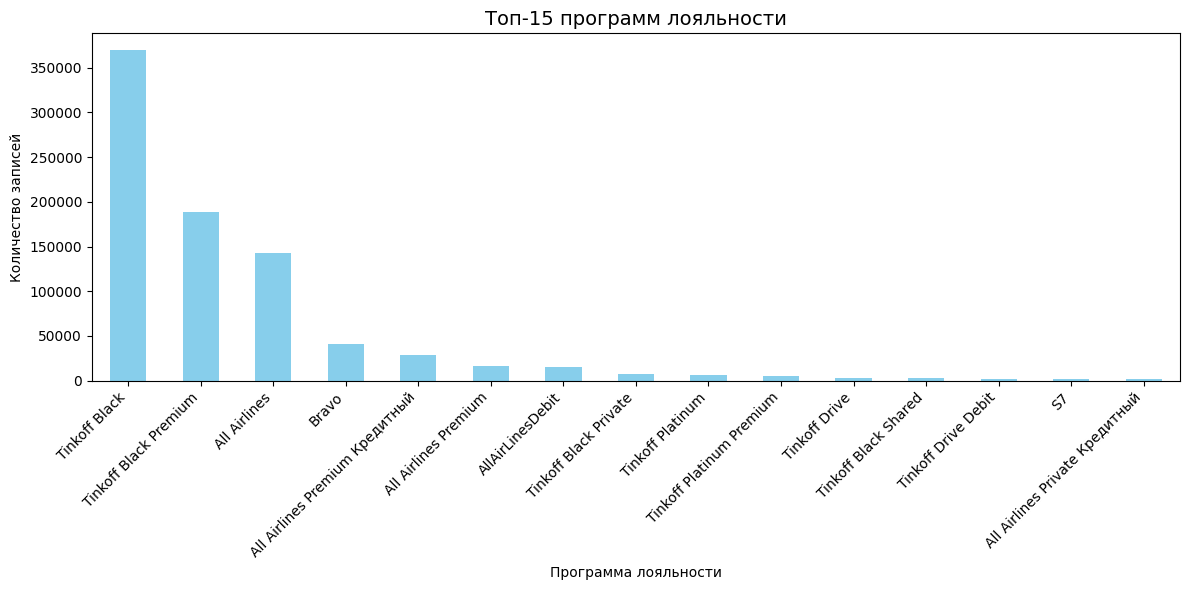


Топ-10 программ по среднему чеку:
                                avg_order_value  orders_count  avg_items
loyalty_program_type_nm                                                 
Tinkoff Platinum Private               38462.00           387       1.43
Tinkoff Black Private                  35483.03          6994       1.38
All Airlines Private Кредитный         31488.40          1390       1.45
Tinkoff Black USD                      28316.66            32       1.56
Tinkoff Black EUR                      27996.83             6       1.83
Tinkoff Black BYN                      25879.00             1       1.00
All Airlines Premium Кредитный         21060.54         28634       1.38
S7 Tinkoff Premium Кредитный           19670.61           405       1.30
Tinkoff Platinum Premium               19456.73          5737       1.34
All Airlines Premium                   18903.31         16277       1.42


In [36]:
print("\nУникальные программы лояльности:")
loyalty_distribution = df['loyalty_program_type_nm'].value_counts(dropna=False)
print(loyalty_distribution)
print(f"\nПроцентное распределение:")
print(df['loyalty_program_type_nm'].value_counts(normalize=True, dropna=False) * 100)

# Визуализируем топ-15 программ
plt.figure(figsize=(12,6))
top15 = loyalty_distribution.head(15)
top15.plot(kind='bar', color='skyblue')
plt.title('Топ-15 программ лояльности', fontsize=14)
plt.xlabel('Программа лояльности')
plt.ylabel('Количество записей')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Строим иерархию программ лояльности
# Анализируем средние чеки для определения уровней
program_stats = df.groupby('loyalty_program_type_nm').agg({
    'nominal_price_rub_amt': ['mean', 'count'],
    'order_item_cnt': 'mean'
}).round(2)

program_stats.columns = ['avg_order_value', 'orders_count', 'avg_items']
program_stats = program_stats.sort_values('avg_order_value', ascending=False)

print("\nТоп-10 программ по среднему чеку:")
print(program_stats.head(10))


Создана иерархия из 5 уровней:

Уровень 1 (18 программ):
  - Tinkoff Black
  - Tinkoff Black Shared
  - Tinkoff Black USD
  - Tinkoff Black EUR
  - Tinkoff Black BYN
  ... и еще 13

Уровень 2 (8 программ):
  - Bravo
  - All Airlines
  - S7
  - AliExpress
  - Lamoda
  ... и еще 3

Уровень 3 (5 программ):
  - Tinkoff Black Premium
  - Tinkoff Platinum
  - All Airlines Premium
  - S7 Tinkoff Premium
  - Tinkoff Platinum Premium

Уровень 4 (3 программ):
  - All Airlines Premium Кредитный
  - All Airlines Private Кредитный
  - S7 Tinkoff Premium Кредитный

Уровень 5 (2 программ):
  - Tinkoff Black Private
  - Tinkoff Platinum Private

Распределение уровней лояльности:
Уровень 1: 394023 записей (47.1%)
Уровень 2: 186479 записей (22.3%)
Уровень 3: 217623 записей (26.0%)
Уровень 4: 30429 записей (3.6%)
Уровень 5: 7381 записей (0.9%)


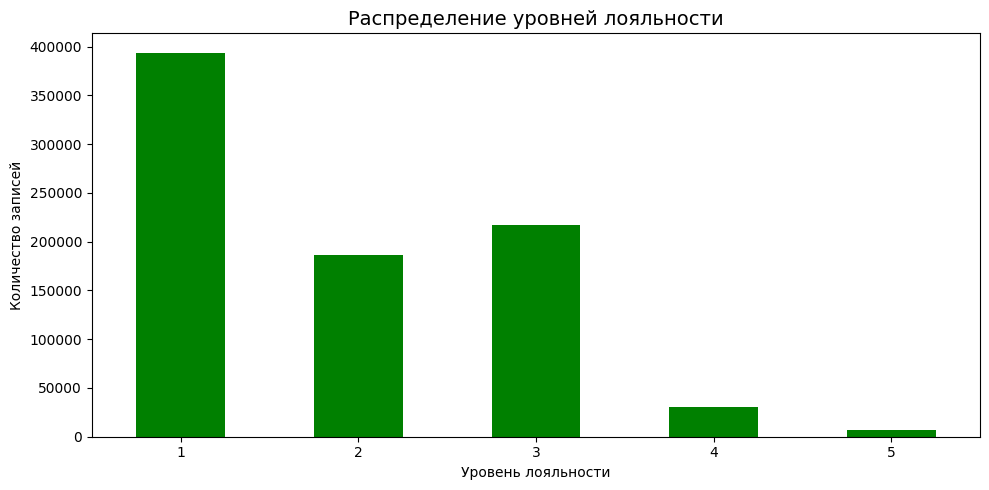


Метрики по уровням лояльности:
              nominal_price_rub_amt                    order_item_cnt  \
                               mean   median       std           mean   
loyalty_level                                                           
1                          12329.12   9342.0  15968.80           1.25   
2                          14371.94   9012.0  19310.71           1.32   
3                          18131.31   9977.0  30479.88           1.34   
4                          21518.39  11389.0  34501.77           1.38   
5                          35639.22  15564.0  71815.03           1.38   

              loyalty_accrual_rub_amt promo_code_discount_amt  
                                 mean                    mean  
loyalty_level                                                  
1                              415.42                    3.99  
2                              325.07                    4.43  
3                              808.53                    3.58  

In [37]:
# Создаем иерархию на основе логики и статистики
loyalty_mapping = {
    # Базовые/дебетовые карты (уровень 1)
    'Tinkoff Black': 1,
    'Tinkoff Black Shared': 1,
    'Tinkoff Black USD': 1,
    'Tinkoff Black EUR': 1,
    'Tinkoff Black BYN': 1,
    'Tinkoff Drive': 1,
    'Tinkoff Drive Debit': 1,
    'Tinkoff Mobile': 1,
    'Tinkoff Junior': 1,
    'AllAirLinesDebit': 1,
    'S7Debit': 1,
    'AliExpressDebit': 1,
    'LamodaDebit': 1,
    'LukoilDebit': 1,
    'All Games Debit': 1,
    'WargamingTanksDebit': 1,
    'WargamingBlitzDebit': 1,
    'WargamingWarshipsDebit': 1,

    # Кобрендовые и специализированные программы (уровень 2)
    'Bravo': 2,
    'All Airlines': 2,
    'S7': 2,
    'AliExpress': 2,
    'Lamoda': 2,
    'Lukoil': 2,
    'All Games': 2,
    'MIPTDebit': 2,  # Специальный случай

    # Премиальные программы (уровень 3)
    'Tinkoff Black Premium': 3,
    'Tinkoff Platinum': 3,
    'All Airlines Premium': 3,
    'S7 Tinkoff Premium': 3,
    'Tinkoff Platinum Premium': 3,

    # Премиальные кредитные программы (уровень 4)
    'All Airlines Premium Кредитный': 4,
    'All Airlines Private Кредитный': 4,
    'S7 Tinkoff Premium Кредитный': 4,

    # Private banking (уровень 5)
    'Tinkoff Black Private': 5,
    'Tinkoff Platinum Private': 5,
}

print(f"\nСоздана иерархия из {len(set(loyalty_mapping.values()))} уровней:")
for level in sorted(set(loyalty_mapping.values())):
    programs = [p for p, l in loyalty_mapping.items() if l == level]
    print(f"\nУровень {level} ({len(programs)} программ):")
    # Покажем первые 5 программ для примера
    for p in programs[:5]:
        print(f"  - {p}")
    if len(programs) > 5:
        print(f"  ... и еще {len(programs)-5}")

# Проверяем немаррированные программы
all_programs = set(df['loyalty_program_type_nm'].dropna().unique())
mapped_programs = set(loyalty_mapping.keys())
unmapped = all_programs - mapped_programs

if unmapped:
    print(f"\n Найдены программы не в иерархии ({len(unmapped)}):")
    for prog in sorted(unmapped)[:10]:
        print(f"  - {prog}")
    if len(unmapped) > 10:
        print(f"  ... и еще {len(unmapped)-10}")

    # Добавляем немаррированные программы с уровнем 0
    for prog in unmapped:
        loyalty_mapping[prog] = 0

# Создаем колонку с уровнем лояльности в основном датафрейме
df['loyalty_level'] = df['loyalty_program_type_nm'].map(loyalty_mapping).fillna(0).astype(int)

print(f"\nРаспределение уровней лояльности:")
level_dist = df['loyalty_level'].value_counts().sort_index()
for level in sorted(level_dist.index):
    print(f"Уровень {level}: {level_dist[level]} записей ({level_dist[level]/len(df)*100:.1f}%)")

# Визуализация распределения уровней
plt.figure(figsize=(10,5))
level_dist.plot(kind='bar', color='green')
plt.title('Распределение уровней лояльности', fontsize=14)
plt.xlabel('Уровень лояльности')
plt.ylabel('Количество записей')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Анализ метрик по уровням
level_analysis = df.groupby('loyalty_level').agg({
    'nominal_price_rub_amt': ['mean', 'median', 'std'],
    'order_item_cnt': 'mean',
    'loyalty_accrual_rub_amt': 'mean',
    'promo_code_discount_amt': 'mean'
}).round(2)

print("\nМетрики по уровням лояльности:")
print(level_analysis)

# 5. ГЕНЕРАЦИЯ ПРИЗНАКОВ

Подготовка данных и вспомогательная функция

In [38]:
df_clean = df.copy()

# Убедимся, что даты в правильном формате
date_columns = ['party_first_order_dt', 'created_dttm', 'book_start_dttm',
                'last_session_dttm', 'last_sms_dt']
for col in date_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

# Вспомогательная функция для фильтрации данных по дате
def filter_data_before_cutoff(df, cutoff_date):
    """Возвращает данные до cutoff_date"""
    return df[df['created_dttm'] < cutoff_date].copy()

def merge_features(result_df, feature_df):
    """Безопасно объединяет признаки по client_rk"""
    if feature_df is None or feature_df.empty:
        print("  • Пропуск: пустой датафрейм")
        return result_df

    if 'client_rk' not in feature_df.columns:
        print(f"  • Пропуск: нет client_rk в {feature_df.columns[:5]}...")
        return result_df

    # Проверяем дубликаты client_rk
    if feature_df['client_rk'].duplicated().any():
        print(f"  • ВНИМАНИЕ: есть дубликаты client_rk, удаляем")
        feature_df = feature_df.drop_duplicates(subset=['client_rk'])

    before_shape = result_df.shape
    result_df = result_df.merge(feature_df, on='client_rk', how='left')
    print(f"  • Объединено: {before_shape} -> {result_df.shape}")

    return result_df

## 5.1. Признаки дохода с временной динамикой

In [39]:
def create_income_features(df_before):
    """
    Создает признаки на основе дохода клиента
    - income_mean: средний доход
    - income_std: стандартное отклонение дохода
    - income_min: минимальный доход
    - income_max: максимальный доход
    - income_count: количество записей о доходе
    - income_last: последний известный доход до cutoff
    """
    income_features = df_before.groupby('client_rk').agg(
        income_mean=('monthly_income_amt', 'mean'),
        income_std=('monthly_income_amt', 'std'),
        income_min=('monthly_income_amt', 'min'),
        income_max=('monthly_income_amt', 'max'),
        income_count=('monthly_income_amt', 'count'),
        income_last=('monthly_income_amt', 'last')
    ).reset_index()

    # Добавляем признаки изменения дохода
    income_features['income_absolute_change'] = (
        income_features['income_last'] - income_features['income_mean']
    )
    income_features['income_relative_change'] = (
        (income_features['income_last'] / income_features['income_mean'].replace(0, 1) - 1)
        .replace([np.inf, -np.inf], 0)
        .fillna(0)
    )
    income_features['income_increased'] = (
        income_features['income_absolute_change'] > 0
    ).astype(int)

    return income_features

## 5.2. Метрики по стоимости заказов

In [40]:
def create_spending_features(df_before):
    """
    Создает признаки на основе трат клиента
    - total_spent_rub: общая сумма трат
    - avg_order_value: средний чек
    - std_order_value: стандартное отклонение чека
    - order_count: количество заказов
    - total_items: общее количество товаров
    - avg_items: среднее количество товаров в заказе
    - total_bonus_accrued: всего начислено бонусов
    - avg_bonus: средний бонус за заказ
    - total_discount: общая сумма скидок
    - avg_discount: средняя скидка за заказ
    """
    client_features = df_before.groupby('client_rk').agg({
        'nominal_price_rub_amt': ['sum', 'mean', 'std', 'count'],
        'order_item_cnt': ['sum', 'mean'],
        'loyalty_accrual_rub_amt': ['sum', 'mean'],
        'promo_code_discount_amt': ['sum', 'mean']
    }).reset_index()

    client_features.columns = ['client_rk',
                              'total_spent_rub', 'avg_order_value', 'std_order_value', 'order_count',
                              'total_items', 'avg_items',
                              'total_bonus_accrued', 'avg_bonus',
                              'total_discount', 'avg_discount']

    # Производные метрики
    client_features['avg_items_per_order'] = (
        client_features['total_items'] / client_features['order_count'].replace(0, 1)
    )
    client_features['discount_per_order'] = (
        client_features['total_discount'] / client_features['order_count'].replace(0, 1)
    )
    client_features['bonus_per_order'] = (
        client_features['total_bonus_accrued'] / client_features['order_count'].replace(0, 1)
    )
    client_features['spent_per_item'] = (
        client_features['total_spent_rub'] / client_features['total_items'].replace(0, 1)
    )

    # Категории среднего чека
    client_features['avg_order_value_category'] = pd.cut(
        client_features['avg_order_value'],
        bins=[0, 1000, 5000, 15000, 50000, float('inf')],
        labels=['Micro (<1k)', 'Small (1-5k)', 'Medium (5-15k)', 'Large (15-50k)', 'VIP (>50k)']
    )

    # Признак нестабильности трат
    client_features['is_unstable_spender'] = (
        (client_features['std_order_value'] > client_features['avg_order_value'] * 0.7) |
        (client_features['order_count'] == 1)
    ).astype(int)

    return client_features

## 5.3. Любимый тип заказа (HOT/AIR)

In [41]:
def create_favorite_order_type_features(df_before):
    """
    Создает признаки на основе предпочитаемого типа заказа
    - fav_order_type: любимый тип заказа
    - one-hot encoding для каждого типа
    """
    # Определяем любимый тип заказа (самый частый)
    fav_order = df_before.groupby('client_rk')['order_type_cd'].agg(
        lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else 'UNKNOWN'
    ).reset_index()
    fav_order.columns = ['client_rk', 'fav_order_type']

    # One-hot encoding
    fav_order_dummies = pd.get_dummies(fav_order['fav_order_type'], prefix='fav_type')
    fav_order = pd.concat([fav_order[['client_rk']], fav_order_dummies], axis=1)

    return fav_order

## 5.4. Разнообразие заказов

In [42]:
def create_order_diversity_features(df_before):
    """
    Создает признаки разнообразия заказов
    - unique_order_types: количество уникальных типов заказов
    - order_diversity_score: нормализованное разнообразие (0-1)
    """
    order_diversity = df_before.groupby('client_rk')['order_type_cd'].nunique().reset_index()
    order_diversity.columns = ['client_rk', 'unique_order_types']

    # Нормализуем на общее количество типов заказов
    total_types = df_before['order_type_cd'].nunique()
    order_diversity['order_diversity_score'] = order_diversity['unique_order_types'] / total_types

    return order_diversity

## 5.5. Временные признаки (первый и последний заказ)

In [43]:
def create_time_features(df_before, cutoff_date):
    """
    Создает временные признаки на основе истории заказов
    - first_system_date: дата первого появления в системе
    - last_system_date_before_cutoff: дата последней активности до cutoff
    - first_order_date: дата первого заказа
    - customer_lifetime_days_before_cutoff: "возраст" клиента в днях до cutoff
    - days_since_first_order_before_cutoff: дней с первого заказа до cutoff
    - first_order_month: месяц первого заказа
    - first_order_year: год первого заказа
    """
    time_features = df_before.groupby('client_rk').agg({
        'created_dttm': ['min', 'max'],
        'party_first_order_dt': 'first',
        'last_session_dttm': 'max'
    }).reset_index()

    time_features.columns = ['client_rk', 'first_system_date', 'last_system_date_before_cutoff',
                            'first_order_date', 'last_session_date_before_cutoff']

    # Продолжительность активности клиента
    time_features['customer_lifetime_days_before_cutoff'] = (
        time_features['last_system_date_before_cutoff'] - time_features['first_system_date']
    ).dt.days.fillna(0)

    # Время с первого заказа
    time_features['days_since_first_order_before_cutoff'] = (
        cutoff_date - time_features['first_order_date']
    ).dt.days.fillna(0)

    # Сезонность
    time_features['first_order_month'] = time_features['first_order_date'].dt.month
    time_features['first_order_year'] = time_features['first_order_date'].dt.year
    time_features['first_order_quarter'] = time_features['first_order_date'].dt.quarter

    # Активность в последние 30, 90 дней
    recent_date = cutoff_date - pd.Timedelta(days=30)
    very_recent_date = cutoff_date - pd.Timedelta(days=7)

    # Создаем отдельные признаки для последней активности
    last_activity = df_before.groupby('client_rk').agg(
        last_activity_date=('created_dttm', 'max')
    ).reset_index()

    time_features = time_features.merge(last_activity, on='client_rk', how='left')
    time_features['days_since_last_activity'] = (
        cutoff_date - time_features['last_activity_date']
    ).dt.days.fillna(999)

    time_features['was_active_last_30d'] = (
        time_features['last_activity_date'] >= recent_date
    ).astype(int)
    time_features['was_active_last_7d'] = (
        time_features['last_activity_date'] >= very_recent_date
    ).astype(int)

    return time_features

## 5.6. Отмены заказов

In [44]:
def create_cancellation_features(df_before):
    """
    Создает признаки на основе отмен заказов
    - cancellation_count_before: количество отмен до cutoff
    - success_count_before: количество успешных заказов
    - total_orders_before: общее количество заказов
    - cancellation_rate_before: доля отмен
    """
    # Подсчет отмен
    cancellations_before = df_before[df_before['order_status_cd'] == 'CANC'].groupby('client_rk').size().reset_index()
    cancellations_before.columns = ['client_rk', 'cancellation_count_before']

    # Подсчет успешных заказов
    successful_before = df_before[df_before['order_status_cd'] == 'SUC'].groupby('client_rk').size().reset_index()
    successful_before.columns = ['client_rk', 'success_count_before']

    # Объединение
    cancellations = pd.merge(cancellations_before, successful_before, on='client_rk', how='outer').fillna(0)
    cancellations['total_orders_before'] = (
        cancellations['cancellation_count_before'] + cancellations['success_count_before']
    )

    # Доля отмен
    cancellations['cancellation_rate_before'] = (
        cancellations['cancellation_count_before'] / cancellations['total_orders_before'].replace(0, 1)
    )

    # Категории по доле отмен
    cancellations['cancellation_category'] = pd.cut(
        cancellations['cancellation_rate_before'],
        bins=[-0.01, 0, 0.1, 0.3, 0.5, 1.0],
        labels=['No cancellations', 'Low (<10%)', 'Medium (10-30%)', 'High (30-50%)', 'Very High (>50%)']
    )

    return cancellations

## 5.7. Демографические признаки

In [45]:
def create_demographic_features(df_before):
    """
    Создает демографические признаки клиента
    """
    # Убедимся, что группируем правильно
    demo_features = df_before.sort_values('created_dttm').groupby('client_rk').agg({
        'age': 'first',
        'gender_cd': 'first',
        'children_cnt': 'first',
        'marital_status_cd': 'first',
        'education_level_cd': 'first',
        'time_zone_delta_tm': 'first',
        'loyalty_program_type_nm': 'first',
        'loyalty_level': 'first'
    }).reset_index()

    # Проверяем, что client_rk сохранился
    print(f"  • demo_features shape: {demo_features.shape}, client_rk в колонках: {'client_rk' in demo_features.columns}")

    # Обработка пропусков
    demo_features['gender_cd'] = demo_features['gender_cd'].fillna('Unknown')

    # One-hot encoding для пола
    if 'gender_cd' in demo_features.columns:
        gender_dummies = pd.get_dummies(demo_features['gender_cd'], prefix='gender')
        demo_features = pd.concat([demo_features, gender_dummies], axis=1)

    # Категории возраста
    demo_features['age_category'] = pd.cut(
        demo_features['age'],
        bins=[0, 25, 35, 45, 55, 65, 100],
        labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+']
    )

    # Категории количества детей
    demo_features['children_category'] = pd.cut(
        demo_features['children_cnt'],
        bins=[-1, 0, 1, 2, 3, 10],
        labels=['No children', '1 child', '2 children', '3 children', '4+ children']
    )

    print(f"  • Создано {len(demo_features)} записей с демографическими признаками")
    return demo_features

## 5.8. Объединение добавленных признаков

In [46]:
def create_all_features(df, cutoff_date):
    """
    Создает все признаки на основе данных до cutoff_date
    """
    # Фильтруем данные до cutoff_date
    df_before = filter_data_before_cutoff(df, cutoff_date)

    if len(df_before) == 0:
        return pd.DataFrame()

    # Создаем каждый тип признаков отдельно
    income_features = create_income_features(df_before)
    spending_features = create_spending_features(df_before)
    fav_order_features = create_favorite_order_type_features(df_before)
    diversity_features = create_order_diversity_features(df_before)
    time_features = create_time_features(df_before, cutoff_date)
    cancellation_features = create_cancellation_features(df_before)
    demographic_features = create_demographic_features(df_before)

    # Проверяем, что у demographic_features есть client_rk
    if 'client_rk' not in demographic_features.columns:
        print("ОШИБКА: demographic_features не содержит client_rk")
        # Добавляем client_rk из df_before
        client_ids = df_before[['client_rk']].drop_duplicates()
        demographic_features = client_ids.merge(demographic_features, on='client_rk', how='left')

    # Начинаем с демографических признаков
    result = demographic_features.copy()

    # Список всех feature_df для объединения
    feature_list = [
        ('доход', income_features),
        ('финансовые', spending_features),
        ('разнообразие', diversity_features),
        ('временные', time_features),
        ('отмены', cancellation_features),
        ('любимый тип', fav_order_features)
    ]

    # Поочередно объединяем все признаки
    for name, feature_df in feature_list:
        if not feature_df.empty and 'client_rk' in feature_df.columns:
            # Проверяем размер до объединения
            before_shape = result.shape
            result = result.merge(feature_df, on='client_rk', how='left')
            print(f"  • Добавлены {name}: {before_shape} -> {result.shape}")
        else:
            print(f"  • Пропущены {name}: нет client_rk или пустой датафрейм")

    # Заполняем пропуски в числовых колонках
    num_cols = result.select_dtypes(include=[np.number]).columns
    num_cols = [col for col in num_cols if col != 'client_rk']
    result[num_cols] = result[num_cols].fillna(0)

    print(f"\n Финальный all_features: {result.shape}, client_rk в колонках: {'client_rk' in result.columns}")
    return result

## 5.9. Создаем целевую переменную

In [47]:
# Шаг 1: Агрегируем данные по каждому клиенту
print("\n1. АГРЕГАЦИЯ ДАННЫХ ПО КЛИЕНТАМ")
print("-"*50)

client_history = df.groupby('client_rk').agg(
    # Первый и последний заказ
    first_order_date=('party_first_order_dt', 'min'),
    last_session_date=('last_session_dttm', 'max'),

    # Первый и последний уровень лояльности
    first_loyalty_level=('loyalty_level', 'first'),
    last_loyalty_level=('loyalty_level', 'last'),

    # Количество заказов всего
    total_orders=('order_rk', 'count'),

    # Общая сумма трат
    total_spent=('nominal_price_rub_amt', 'sum'),

    # Средний чек
    avg_order_value=('nominal_price_rub_amt', 'mean')
).reset_index()

print(f"Всего клиентов: {len(client_history)}")

# Проверяем временной диапазон
print(f"\nВременной диапазон:")
print(f"  Самый ранний первый заказ: {client_history['first_order_date'].min()}")
print(f"  Самая поздняя последняя сессия: {client_history['last_session_date'].max()}")

# Рассчитываем "возраст" клиента в днях
client_history['customer_lifetime_days'] = (
    client_history['last_session_date'] - client_history['first_order_date']
).dt.days

print(f"\nСтатистика по времени жизни клиента (дней):")
print(client_history['customer_lifetime_days'].describe().apply(lambda x: f"{x:.0f}"))

# Шаг 2: Создаем целевую переменную
print("\n2. СОЗДАНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ")
print("-"*50)

# Target: повысился ли уровень лояльности за всю историю клиента
client_history['target_upgrade'] = (
    client_history['last_loyalty_level'] > client_history['first_loyalty_level']
).astype(int)

print(f"Распределение target_upgrade:")
print(client_history['target_upgrade'].value_counts())
print(f"Доля повысивших: {client_history['target_upgrade'].mean()*100:.2f}%")

# Шаг 3: Создаем признаки (без использования cutoff_date)
print("\n3. СОЗДАНИЕ ПРИЗНАКОВ")
print("-"*50)

# Функция для создания признаков на основе всей истории клиента
def create_all_features_agg(df):
    """
    Создает агрегированные признаки для каждого клиента на основе всей истории
    """
    # Базовые демографические признаки (берем первые значения)
    demo_features = df.sort_values('created_dttm').groupby('client_rk').agg({
        'age': 'first',
        'gender_cd': 'first',
        'children_cnt': 'first',
        'marital_status_cd': 'first',
        'education_level_cd': 'first',
        'time_zone_delta_tm': 'first',
    }).reset_index()

    # Признаки по доходам
    income_features = df.groupby('client_rk').agg({
        'monthly_income_amt': ['mean', 'std', 'min', 'max', 'last']
    }).reset_index()
    income_features.columns = ['client_rk', 'income_mean', 'income_std', 'income_min', 'income_max', 'income_last']

    # Признаки по тратам
    spending_features = df.groupby('client_rk').agg({
        'nominal_price_rub_amt': ['sum', 'mean', 'std', 'count'],
        'order_item_cnt': ['sum', 'mean'],
        'loyalty_accrual_rub_amt': ['sum', 'mean'],
        'promo_code_discount_amt': ['sum', 'mean']
    }).reset_index()
    spending_features.columns = ['client_rk', 'total_spent', 'avg_order_value', 'std_order_value', 'order_count',
                                 'total_items', 'avg_items', 'total_bonus', 'avg_bonus',
                                 'total_discount', 'avg_discount']

    # Признаки по отменам
    cancellations = df[df['order_status_cd'] == 'CANC'].groupby('client_rk').size().reset_index(name='cancellation_count')
    successful = df[df['order_status_cd'] == 'SUC'].groupby('client_rk').size().reset_index(name='success_count')

    cancel_features = pd.merge(cancellations, successful, on='client_rk', how='outer').fillna(0)
    cancel_features['total_orders'] = cancel_features['cancellation_count'] + cancel_features['success_count']
    cancel_features['cancellation_rate'] = cancel_features['cancellation_count'] / cancel_features['total_orders'].replace(0, 1)

    # Объединяем все признаки
    result = demo_features.merge(income_features, on='client_rk', how='left')
    result = result.merge(spending_features, on='client_rk', how='left')
    result = result.merge(cancel_features, on='client_rk', how='left')

    # Заполняем пропуски
    num_cols = result.select_dtypes(include=[np.number]).columns
    num_cols = [col for col in num_cols if col != 'client_rk']
    result[num_cols] = result[num_cols].fillna(0)

    return result

# Создаем признаки
all_features_agg = create_all_features_agg(df)
print(f" Признаки созданы: {all_features_agg.shape}")

# Шаг 4: Объединяем признаки с целевой переменной
print("\n4. ОБЪЕДИНЕНИЕ ПРИЗНАКОВ И ЦЕЛЕВОЙ ПЕРЕМЕННОЙ")
print("-"*50)

final_data = all_features_agg.merge(
    client_history[['client_rk', 'first_loyalty_level', 'last_loyalty_level', 'target_upgrade',
                    'customer_lifetime_days', 'total_orders', 'total_spent']],
    on='client_rk',
    how='left'
)

print(f"Финальный датасет: {final_data.shape}")
print(f"Колонки: {final_data.columns[:10].tolist()}...")

print("\n5. ПРОВЕРКА КАЧЕСТВА ДАННЫХ")
print("-"*50)

# Проверяем пропуски
missing = final_data.isnull().sum()
if missing.sum() > 0:
    print(" Есть пропуски:")
    print(missing[missing > 0])
else:
    print(" Пропусков нет")

# Проверяем распределение target
print(f"\nРаспределение target_upgrade:")
target_dist = final_data['target_upgrade'].value_counts()
target_pct = final_data['target_upgrade'].value_counts(normalize=True) * 100
print(f"  0 (без повышения): {target_dist[0]} ({target_pct[0]:.2f}%)")
print(f"  1 (с повышением): {target_dist[1]} ({target_pct[1]:.2f}%)")

# Проверяем корреляцию с временем жизни
print(f"\nКорреляция target с временем жизни клиента: {final_data['target_upgrade'].corr(final_data['customer_lifetime_days']):.3f}")

final_data.to_csv('final_training_data.csv', index=False)
print(" Финальный датасет сохранен в 'final_training_data.csv'")


1. АГРЕГАЦИЯ ДАННЫХ ПО КЛИЕНТАМ
--------------------------------------------------
Всего клиентов: 148361

Временной диапазон:
  Самый ранний первый заказ: 2017-09-26 00:00:00
  Самая поздняя последняя сессия: 2024-11-07 01:16:17

Статистика по времени жизни клиента (дней):
count    99311
mean      1003
std        640
min          0
25%        477
50%        860
75%       1443
max       2598
Name: customer_lifetime_days, dtype: object

2. СОЗДАНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
--------------------------------------------------
Распределение target_upgrade:
target_upgrade
0    144083
1      4278
Name: count, dtype: int64
Доля повысивших: 2.88%

3. СОЗДАНИЕ ПРИЗНАКОВ
--------------------------------------------------
 Признаки созданы: (148361, 26)

4. ОБЪЕДИНЕНИЕ ПРИЗНАКОВ И ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
--------------------------------------------------
Финальный датасет: (148361, 32)
Колонки: ['client_rk', 'age', 'gender_cd', 'children_cnt', 'marital_status_cd', 'education_level_cd', 'time_zone_delta_tm',

## 5.10. Работа с пропусками

In [48]:
# Создаем копию финальных данных
df_clean = final_data.copy()

print(f"\nИсходный размер датасета: {df_clean.shape}")
print(f"Пропуски до обработки:")
print(df_clean[['marital_status_cd', 'education_level_cd', 'customer_lifetime_days']].isnull().sum())

print("\n1. ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("-"*50)

# 1. marital_status_cd (семейное положение)
missing_marital = df_clean['marital_status_cd'].isnull().sum()
df_clean['marital_status_cd'] = df_clean['marital_status_cd'].fillna('UNKNOWN')
df_clean['marital_status_missing'] = (df_clean['marital_status_cd'] == 'UNKNOWN').astype(int)
print(f"marital_status_cd: заполнено {missing_marital} пропусков -> 'UNKNOWN'")
print(f"   создан флаг marital_status_missing")

# 2. education_level_cd (образование)
missing_edu = df_clean['education_level_cd'].isnull().sum()
df_clean['education_level_cd'] = df_clean['education_level_cd'].fillna('UNKNOWN')
df_clean['education_missing'] = (df_clean['education_level_cd'] == 'UNKNOWN').astype(int)
print(f"education_level_cd: заполнено {missing_edu} пропусков -> 'UNKNOWN'")
print(f"   создан флаг education_missing")

print("\n2. ОБРАБОТКА ЧИСЛОВЫХ ПРИЗНАКОВ")
print("-"*50)

# 3. customer_lifetime_days (время жизни клиента)
# Пропуски возникают, если у клиента нет первого заказа (party_first_order_dt)
missing_lifetime = df_clean['customer_lifetime_days'].isnull().sum()

print(f"customer_lifetime_days: {missing_lifetime} пропусков")

# Анализируем клиентов без первого заказа
clients_without_first = df_clean[df_clean['customer_lifetime_days'].isnull()]
print(f"\nАнализ клиентов без первого заказа:")
print(f"  Всего таких клиентов: {len(clients_without_first)}")
print(f"  Из них повысили уровень: {clients_without_first['target_upgrade'].sum()}")
print(f"  Средний уровень лояльности: {clients_without_first['first_loyalty_level'].mean():.2f}")

# Заполняем пропуски
df_clean['customer_lifetime_days'] = df_clean['customer_lifetime_days'].fillna(0)
df_clean['lifetime_missing'] = (df_clean['customer_lifetime_days'] == 0).astype(int)
print(f"\n customer_lifetime_days: заполнено 0 (нет первого заказа)")
print(f"   создан флаг lifetime_missing")

print("\n3. ПРОВЕРКА ПОСЛЕ ОБРАБОТКИ")
print("-"*50)

# Проверяем, остались ли пропуски
remaining_missing = df_clean.isnull().sum()
if remaining_missing.sum() == 0:
    print(" Все пропуски обработаны!")
else:
    print(" Остались пропуски:")
    print(remaining_missing[remaining_missing > 0])

print("\n4. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ")
print("-"*50)

# Анализируем клиентов без первого заказа (lifetime_days = 0)
clients_without_first_order = df_clean[df_clean['lifetime_missing'] == 1]
print(f"Клиентов без первого заказа: {len(clients_without_first_order)}")
print(f"Из них повысили уровень: {clients_without_first_order['target_upgrade'].sum()} ({clients_without_first_order['target_upgrade'].mean()*100:.2f}%)")

# Проверяем распределение новых флагов (ИСПРАВЛЕНО)
print(f"\nРаспределение флагов пропусков:")
print(f"  marital_status_missing: {df_clean['marital_status_missing'].sum()} ({df_clean['marital_status_missing'].mean()*100:.2f}%)")
print(f"  education_missing: {df_clean['education_missing'].sum()} ({df_clean['education_missing'].mean()*100:.2f}%)")
print(f"  lifetime_missing: {df_clean['lifetime_missing'].sum()} ({df_clean['lifetime_missing'].mean()*100:.2f}%)")

# Проверяем связь между пропусками
print("\nПересечение пропусков:")
missing_marital_edu = df_clean[(df_clean['marital_status_missing'] == 1) & (df_clean['education_missing'] == 1)]
print(f"  Пропуски и в marital, и в education: {len(missing_marital_edu)}")

missing_all = df_clean[(df_clean['marital_status_missing'] == 1) &
                       (df_clean['education_missing'] == 1) &
                       (df_clean['lifetime_missing'] == 1)]
print(f"  Пропуски во всех трех полях: {len(missing_all)}")

df_clean.to_csv('final_training_data_clean.csv', index=False)
print(" Очищенный датасет сохранен в 'final_training_data_clean.csv'")

print(f"\nФинальный размер датасета: {df_clean.shape}")
print(f"Количество признаков: {df_clean.shape[1]}")


Исходный размер датасета: (148361, 32)
Пропуски до обработки:
marital_status_cd         59590
education_level_cd        68535
customer_lifetime_days    49050
dtype: int64

1. ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
--------------------------------------------------
marital_status_cd: заполнено 59590 пропусков -> 'UNKNOWN'
   создан флаг marital_status_missing
education_level_cd: заполнено 68535 пропусков -> 'UNKNOWN'
   создан флаг education_missing

2. ОБРАБОТКА ЧИСЛОВЫХ ПРИЗНАКОВ
--------------------------------------------------
customer_lifetime_days: 49050 пропусков

Анализ клиентов без первого заказа:
  Всего таких клиентов: 49050
  Из них повысили уровень: 0
  Средний уровень лояльности: 1.00

 customer_lifetime_days: заполнено 0 (нет первого заказа)
   создан флаг lifetime_missing

3. ПРОВЕРКА ПОСЛЕ ОБРАБОТКИ
--------------------------------------------------
 Все пропуски обработаны!

4. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ
--------------------------------------------------
Клиентов без первого 

## 5.11. Работа с выбросами

Размер датасета: (148361, 35)

1. ОБЩАЯ СТАТИСТИКА ПО ВЫБРОСАМ
--------------------------------------------------
               колонка  выбросов_шт  выбросов_%      мин        макс  медиана       Q1        Q3  нижняя_граница  верхняя_граница
             avg_bonus        43281       29.17  -840.86    61179.70   326.00   326.00    392.60          226.10           492.50
       avg_order_value        18832       12.69    89.50   449258.67  9342.00  8960.33  13691.67         1863.33         20788.67
           income_last        17990       12.13     0.00 67000000.00 97150.00 53600.00 107200.00       -26800.00        187600.00
            income_min        17990       12.13     0.00 67000000.00 97150.00 53600.00 107200.00       -26800.00        187600.00
            income_max        17990       12.13     0.00 67000000.00 97150.00 53600.00 107200.00       -26800.00        187600.00
           income_mean        17990       12.13     0.00 67000000.00 97150.00 53600.00 107200.00       -26

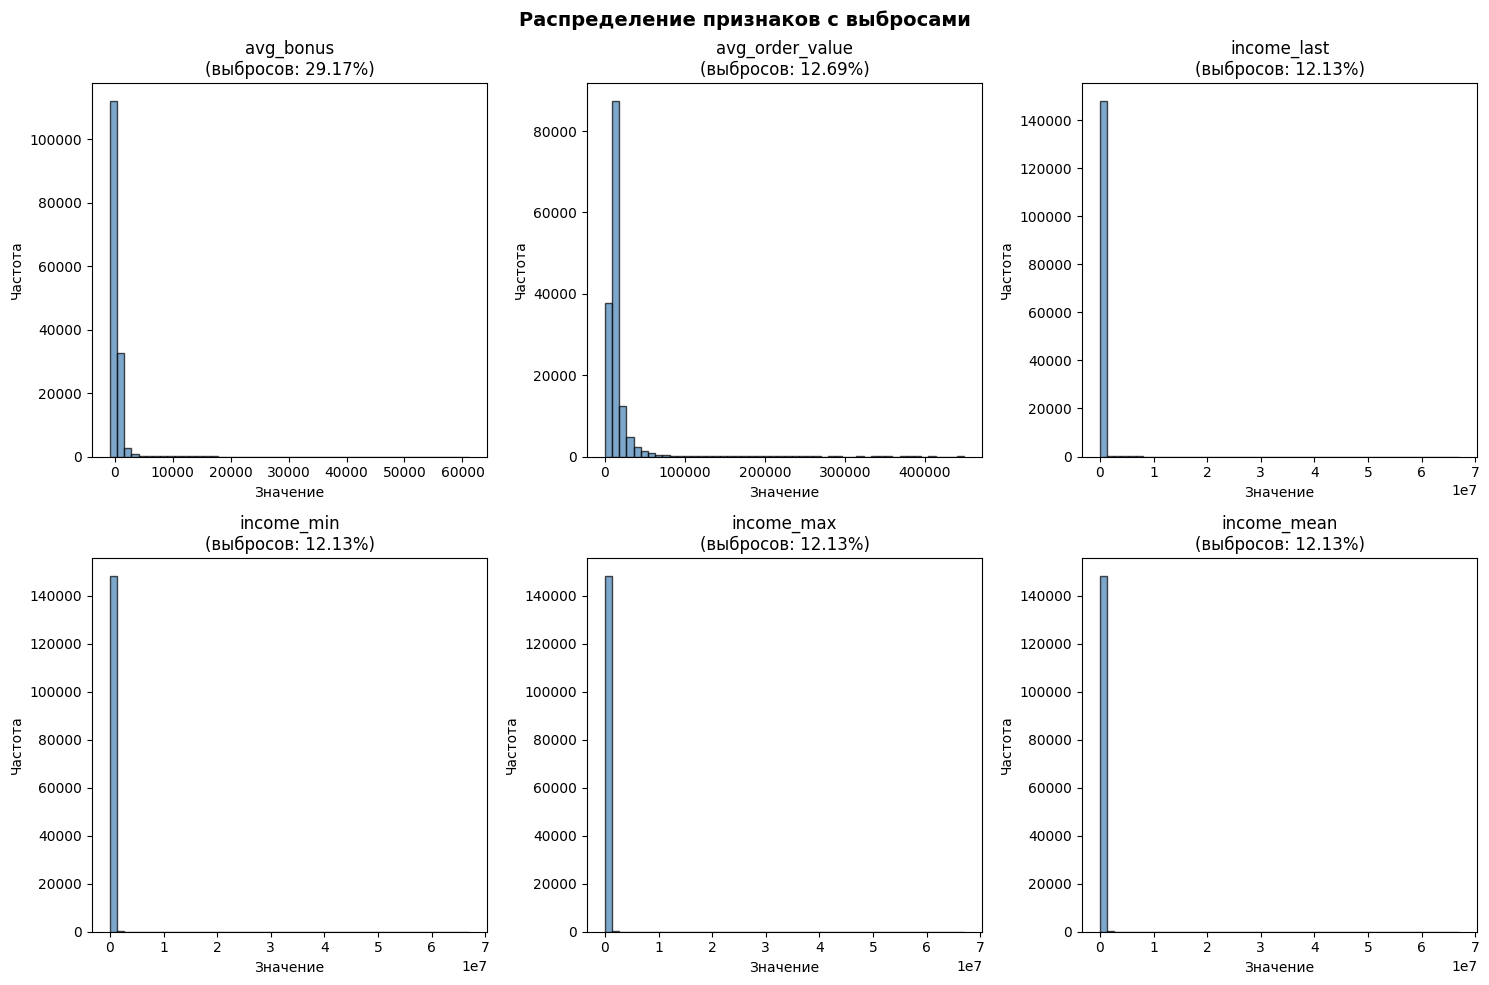


Анализ avg_bonus:
  Нормальные значения: 105080 клиентов, target_rate: 2.60%
  Выбросы: 43281 клиентов, target_rate: 3.57%
  Разница: 0.97%

Анализ avg_order_value:
  Нормальные значения: 129529 клиентов, target_rate: 2.63%
  Выбросы: 18832 клиентов, target_rate: 4.64%
  Разница: 2.01%

Анализ income_last:
  Нормальные значения: 130371 клиентов, target_rate: 2.45%
  Выбросы: 17990 клиентов, target_rate: 6.00%
  Разница: 3.54%

Размер анализируемого датасета: (148361, 35)
Колонки: ['client_rk', 'age', 'gender_cd', 'children_cnt', 'marital_status_cd', 'education_level_cd', 'time_zone_delta_tm', 'income_mean', 'income_std', 'income_min', 'income_max', 'income_last', 'total_spent_x', 'avg_order_value', 'std_order_value', 'order_count', 'total_items', 'avg_items', 'total_bonus', 'avg_bonus', 'total_discount', 'avg_discount', 'cancellation_count', 'success_count', 'total_orders_x', 'cancellation_rate', 'first_loyalty_level', 'last_loyalty_level', 'target_upgrade', 'customer_lifetime_days', 

In [49]:
# Загружаем финальный датасет
df_final = pd.read_csv('final_training_data_clean.csv')
print(f"Размер датасета: {df_final.shape}")

# Выбираем числовые колонки (исключая бинарные и флаги)
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()

# Исключаем целевую переменную и бинарные флаги
exclude_cols = ['target_upgrade', 'marital_status_missing', 'education_missing', 'lifetime_missing']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Функция для расчета статистики по выбросам
def analyze_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = len(outliers)
    outliers_pct = (outliers_count / len(df)) * 100

    return {
        'колонка': col,
        'выбросов_шт': outliers_count,
        'выбросов_%': round(outliers_pct, 2),
        'мин': round(df[col].min(), 2),
        'макс': round(df[col].max(), 2),
        'медиана': round(df[col].median(), 2),
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'нижняя_граница': round(lower_bound, 2),
        'верхняя_граница': round(upper_bound, 2)
    }

# Собираем информацию по всем колонкам
outliers_info = []
for col in numeric_cols:
    outliers_info.append(analyze_outliers(df_final, col))

outliers_df = pd.DataFrame(outliers_info)
outliers_df = outliers_df.sort_values('выбросов_%', ascending=False)

print("\n1. ОБЩАЯ СТАТИСТИКА ПО ВЫБРОСАМ")
print("-"*50)
print(outliers_df.to_string(index=False))

print("\n2. ТОП-10 КОЛОНОК С НАИБОЛЬШИМ ПРОЦЕНТОМ ВЫБРОСОВ")
print("-"*50)
top_outliers = outliers_df.head(10)
for idx, row in top_outliers.iterrows():
    print(f"{idx+1}. {row['колонка']}: {row['выбросов_%']}% ({row['выбросов_шт']} выбросов)")

print("\n3. ВИЗУАЛИЗАЦИЯ ВЫБРОСОВ (гистограммы)")
print("-"*50)

# Выбираем топ-6 колонок с выбросами для визуализации
plot_cols = outliers_df.head(6)['колонка'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Распределение признаков с выбросами', fontsize=14, fontweight='bold')

for idx, col in enumerate(plot_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]

    # Гистограмма вместо boxplot
    ax.hist(df_final[col].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_title(f"{col}\n(выбросов: {outliers_df[outliers_df['колонка']==col]['выбросов_%'].values[0]}%)")
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

# Для топ-3 колонок с выбросами проверяем влияние на target
top3_cols = outliers_df.head(3)['колонка'].tolist()

for col in top3_cols:
    print(f"\nАнализ {col}:")

    # Разделяем на нормальные значения и выбросы
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    normal = df_final[(df_final[col] >= lower_bound) & (df_final[col] <= upper_bound)]
    outliers = df_final[(df_final[col] < lower_bound) | (df_final[col] > upper_bound)]

    # Сравниваем target в группах
    normal_target_rate = normal['target_upgrade'].mean() * 100
    outliers_target_rate = outliers['target_upgrade'].mean() * 100

    print(f"  Нормальные значения: {len(normal)} клиентов, target_rate: {normal_target_rate:.2f}%")
    print(f"  Выбросы: {len(outliers)} клиентов, target_rate: {outliers_target_rate:.2f}%")
    print(f"  Разница: {outliers_target_rate - normal_target_rate:.2f}%")

print(f"\nРазмер анализируемого датасета: {df_final.shape}")
print(f"Колонки: {df_final.columns.tolist()}")

Принятие решений по колонкам:

Требуют обработки:

avg_bonus (29% выбросов), avg_order_value (12.7%), total_bonus/total_spent (~8%) - это естественные выбросы (VIP-клиенты), логарифмируем и создаем флаг

income_ колонки (12.1%) - это реальные данные, логарифмируем и создаем флаг

avg_items (9.8%) показатель количества заказов на одного клиента - винзоризация


In [50]:
# Загружаем данные, очищенные от пропусков
df_clean = pd.read_csv('final_training_data_clean.csv')
print(f"Исходный размер датасета (clean): {df_clean.shape}")

# Создаем копию для обработки выбросов
df_processed = df_clean.copy()

print("\n1. ЛОГАРИФМИЧЕСКОЕ ПРЕОБРАЗОВАНИЕ (для сильно скошенных данных)")
print("-"*50)

# Колонки с высоким процентом выбросов, которые нужно логарифмировать
high_outlier_cols = {
    'avg_bonus': 'avg_bonus_log',           # 29.17% выбросов
    'total_bonus': 'total_bonus_log',       # 8.49% выбросов
    'avg_order_value': 'avg_order_value_log', # 12.69% выбросов
    'total_spent_x': 'total_spent_log',     # 8.36% выбросов
    'income_mean': 'income_log'              # 12.13% выбросов
}

for orig_col, new_col in high_outlier_cols.items():
    if orig_col in df_processed.columns:
        # Добавляем 1 чтобы избежать log(0)
        df_processed[new_col] = np.log1p(df_processed[orig_col].clip(lower=0))
        print(f" Создана {new_col} из {orig_col}")

print("\n2. ВИНЗОРИЗАЦИЯ (ограничение экстремальных значений)")
print("-"*50)

# Для колонок с меньшим процентом выбросов применяем винзоризацию
winsor_cols = ['avg_items', 'income_std']

for col in winsor_cols:
    if col in df_processed.columns:
        # Ограничиваем 99-м перцентилем
        upper_limit = df_processed[col].quantile(0.99)
        lower_limit = df_processed[col].quantile(0.01)

        df_processed[f'{col}_winsor'] = df_processed[col].clip(lower_limit, upper_limit)
        print(f" Создана {col}_winsor (ограничено [{lower_limit:.2f}, {upper_limit:.2f}])")

print("\n3. СОЗДАНИЕ ФЛАГОВ ДЛЯ ЭКСТРЕМАЛЬНЫХ КЛИЕНТОВ")
print("-"*50)

# Флаг для VIP-клиентов (топ 5% по тратам)
top_spender_threshold = df_processed['total_spent_x'].quantile(0.95)
df_processed['is_vip_spender'] = (df_processed['total_spent_x'] > top_spender_threshold).astype(int)
print(f" Создан is_vip_spender: {df_processed['is_vip_spender'].sum()} клиентов (топ 5% по тратам)")

# Флаг для клиентов с аномально высокими бонусами
top_bonus_threshold = df_processed['avg_bonus'].quantile(0.95)
df_processed['is_high_bonus'] = (df_processed['avg_bonus'] > top_bonus_threshold).astype(int)
print(f" Создан is_high_bonus: {df_processed['is_high_bonus'].sum()} клиентов")

# Флаг для клиентов с высоким доходом
top_income_threshold = df_processed['income_mean'].quantile(0.95)
df_processed['is_high_income'] = (df_processed['income_mean'] > top_income_threshold).astype(int)
print(f" Создан is_high_income: {df_processed['is_high_income'].sum()} клиентов")

print("\n4. ФИНАЛЬНАЯ ПРОВЕРКА")
print("-"*50)

print(f"Размер обработанного датасета: {df_processed.shape}")
print(f"Новые колонки: {[col for col in df_processed.columns if col not in df_clean.columns]}")
print(f"Всего колонок: {df_processed.shape[1]}")

# Сохраняем обработанный датасет
df_processed.to_csv('final_training_data_processed.csv', index=False)
print("\n Обработанный датасет сохранен в 'final_training_data_processed.csv'")

Исходный размер датасета (clean): (148361, 35)

1. ЛОГАРИФМИЧЕСКОЕ ПРЕОБРАЗОВАНИЕ (для сильно скошенных данных)
--------------------------------------------------
 Создана avg_bonus_log из avg_bonus
 Создана total_bonus_log из total_bonus
 Создана avg_order_value_log из avg_order_value
 Создана total_spent_log из total_spent_x
 Создана income_log из income_mean

2. ВИНЗОРИЗАЦИЯ (ограничение экстремальных значений)
--------------------------------------------------
 Создана avg_items_winsor (ограничено [1.00, 2.71])
 Создана income_std_winsor (ограничено [0.00, 0.00])

3. СОЗДАНИЕ ФЛАГОВ ДЛЯ ЭКСТРЕМАЛЬНЫХ КЛИЕНТОВ
--------------------------------------------------
 Создан is_vip_spender: 7418 клиентов (топ 5% по тратам)
 Создан is_high_bonus: 7418 клиентов
 Создан is_high_income: 7396 клиентов

4. ФИНАЛЬНАЯ ПРОВЕРКА
--------------------------------------------------
Размер обработанного датасета: (148361, 45)
Новые колонки: ['avg_bonus_log', 'total_bonus_log', 'avg_order_value_log', 'to

# 6. ФИНАЛЬНЫЙ ДАТАСЕТ

## 6.2. Финальный EDA

ФИНАЛЬНЫЙ EDA: final_training_data_processed.csv
Размер датасета: (148361, 45)
Количество клиентов: 148,361
Количество признаков: 45

1. ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ

Типы данных:
float64    29
int64      11
object      5
Name: count, dtype: int64

Проверка пропусков:
 Пропусков нет - все обработано

2. СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ
Всего числовых признаков: 40

Статистика (первые 10 признаков):
                    count       mean        std    min       25%       50%  \
age              148361.0      35.66      10.22   14.0     28.00     35.00   
children_cnt     148361.0       0.06       0.32    0.0      0.00      0.00   
income_mean      148361.0  114215.81  249971.94    0.0  53600.00  97150.00   
income_std       148361.0       0.00       0.00    0.0      0.00      0.00   
income_min       148361.0  114215.81  249971.94    0.0  53600.00  97150.00   
income_max       148361.0  114215.81  249971.94    0.0  53600.00  97150.00   
income_last      148361.0  114215.81  249971.94    0.0  53

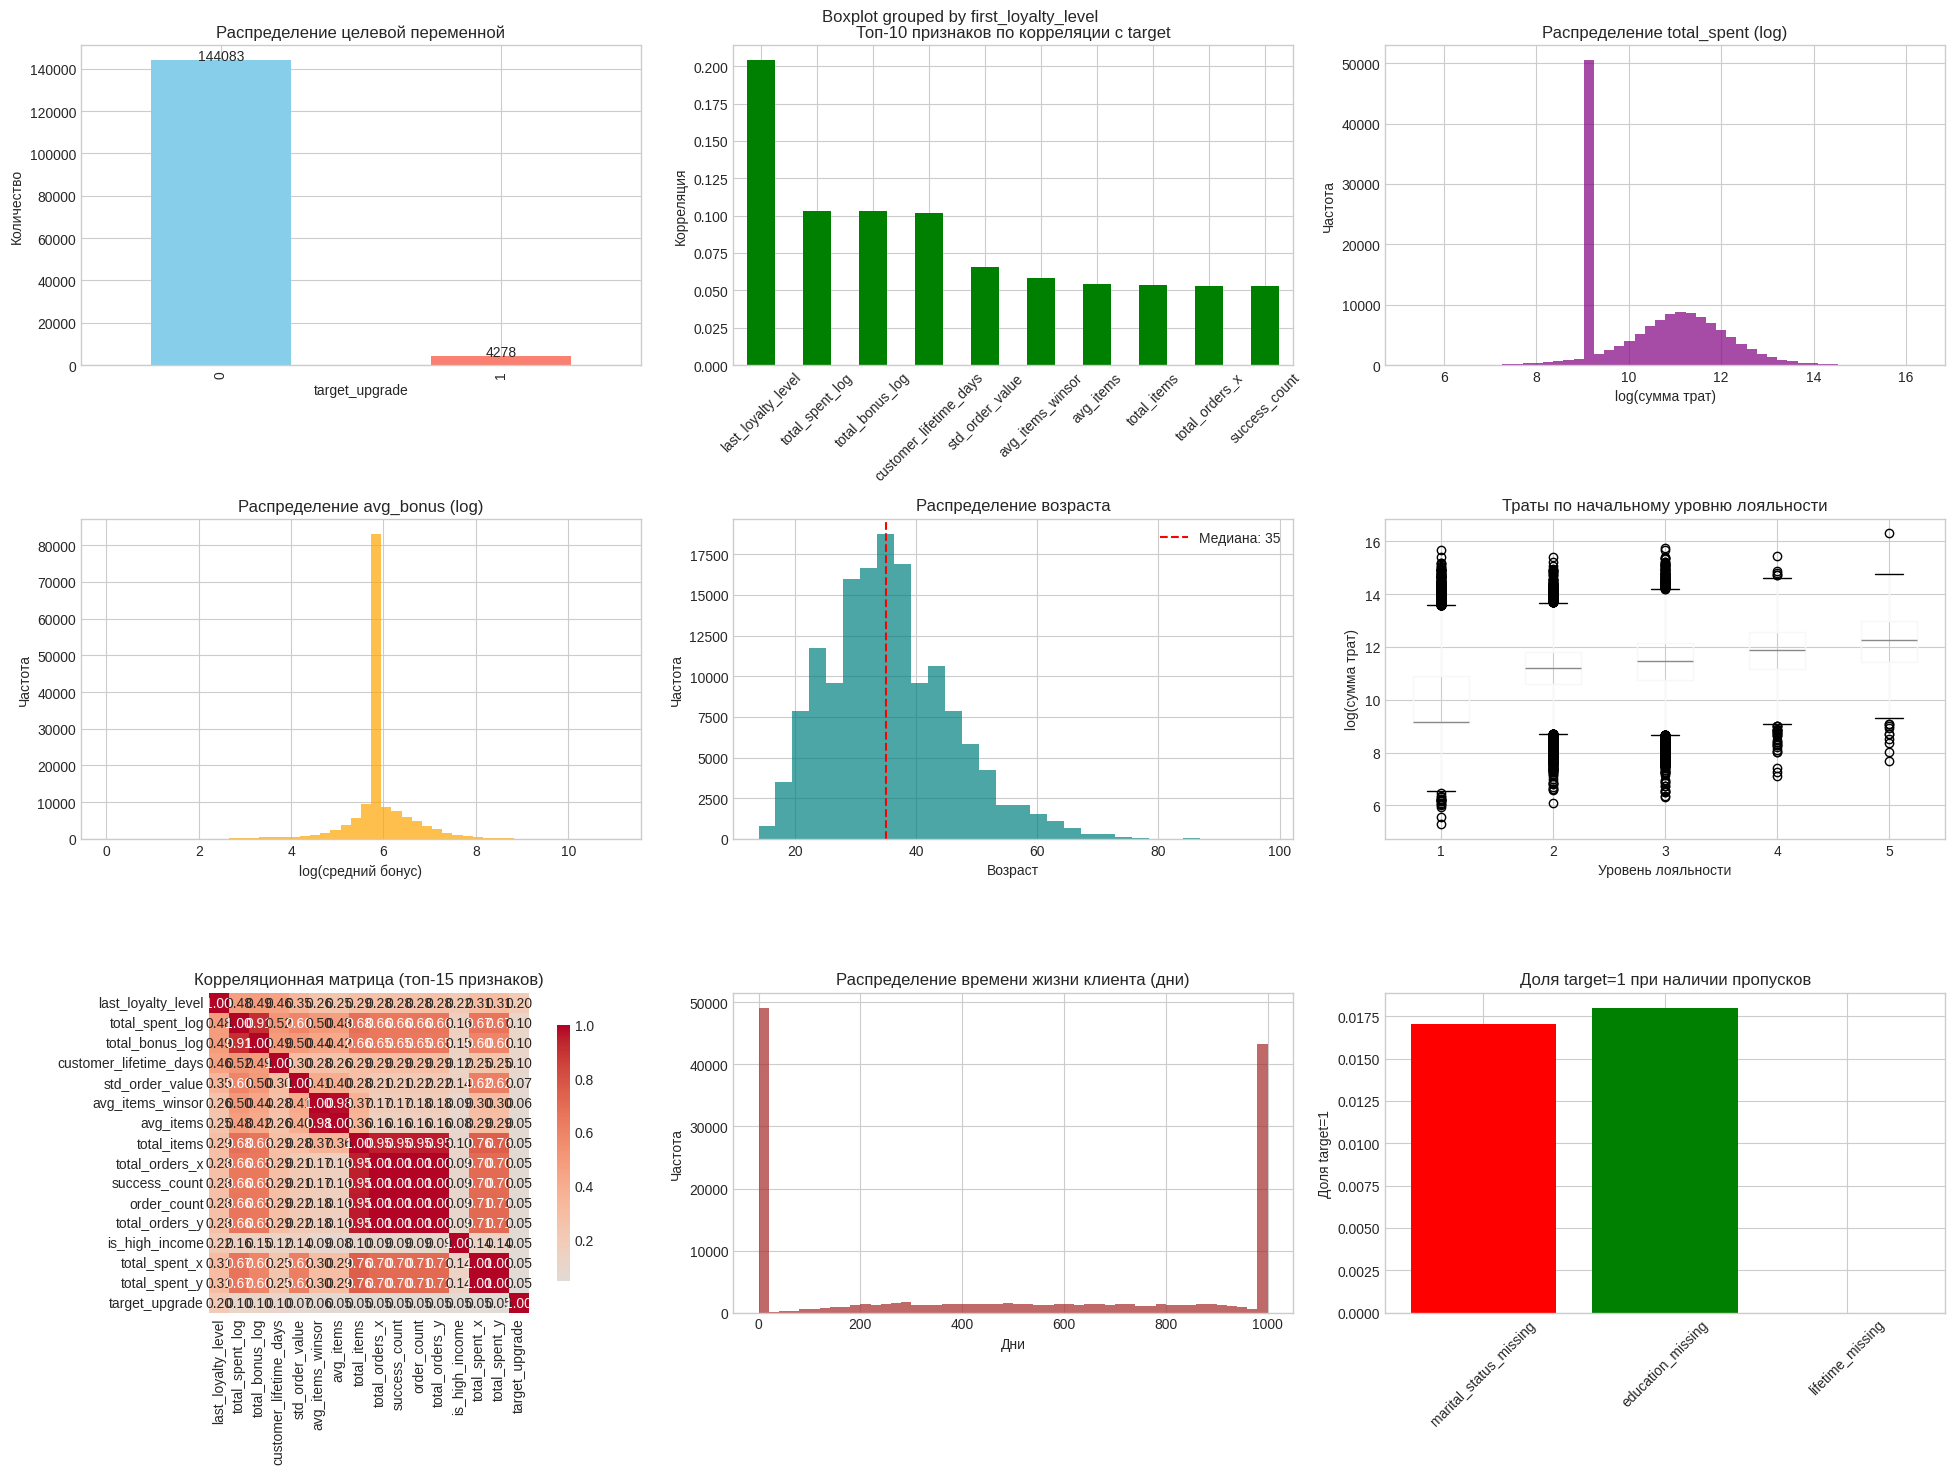


7. КЛЮЧЕВЫЕ ВЫВОДЫ

1. РАЗМЕР ДАННЫХ:
   - Клиентов: 148,361
   - Признаков: 45
   - Числовых: 40
   - Категориальных: 4

2. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ:
   - Доля повысивших: 2.88% (4,278 клиентов)
   - Доля не повысивших: 97.12% (144,083 клиентов)

3. КЛЮЧЕВЫЕ ПРИЗНАКИ (топ-5 по корреляции):

   1. last_loyalty_level: 0.2040
   2. total_spent_log: 0.1032
   3. total_bonus_log: 0.1028
   4. customer_lifetime_days: 0.1018
   5. std_order_value: 0.0659


In [51]:
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("="*80)
print("ФИНАЛЬНЫЙ EDA: final_training_data_processed.csv")
print("="*80)

# Загружаем финальный датасет
df_final = pd.read_csv('final_training_data_processed.csv')
print(f"Размер датасета: {df_final.shape}")
print(f"Количество клиентов: {df_final.shape[0]:,}")
print(f"Количество признаков: {df_final.shape[1]}")

# 1. ОБЩАЯ ИНФОРМАЦИЯ
print("\n" + "="*80)
print("1. ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ")
print("="*80)

# Типы данных
print("\nТипы данных:")
dtype_counts = df_final.dtypes.value_counts()
print(dtype_counts)

# Пропуски (должны быть 0)
print("\nПроверка пропусков:")
missing = df_final.isnull().sum()
if missing.sum() == 0:
    print(" Пропусков нет - все обработано")
else:
    print(" Найдены пропуски:")
    print(missing[missing > 0])

# 2. СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ
print("\n" + "="*80)
print("2. СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ")
print("="*80)

# Выбираем числовые колонки (исключая ID и бинарные)
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['client_rk']  # Исключаем ID
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

print(f"Всего числовых признаков: {len(numeric_cols)}")

# Основная статистика
stats_df = df_final[numeric_cols].describe().T
stats_df['skew'] = df_final[numeric_cols].skew()
stats_df['kurtosis'] = df_final[numeric_cols].kurtosis()

print("\nСтатистика (первые 10 признаков):")
print(stats_df.head(10).round(2))

# Признаки с высоким skew (>1 или <-1)
high_skew = stats_df[abs(stats_df['skew']) > 1]
print(f"\nПризнаки с высоким skew (>1): {len(high_skew)}")
if len(high_skew) > 0:
    print(high_skew[['mean', 'std', 'skew']].head(10))

# 3. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
print("\n" + "="*80)
print("3. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ")
print("="*80)

if 'target_upgrade' in df_final.columns:
    target_dist = df_final['target_upgrade'].value_counts().sort_index()
    target_pct = df_final['target_upgrade'].value_counts(normalize=True).sort_index() * 100

    print(f"0 (без повышения): {target_dist[0]:,} ({target_pct[0]:.2f}%)")
    print(f"1 (с повышением): {target_dist[1]:,} ({target_pct[1]:.2f}%)")

    # Баланс классов
    if target_pct[1] < 10:
        print(" Сильный дисбаланс классов: положительных примеров <10%")
        print("   Рекомендуется использовать: class_weight='balanced' или SMOTE")
    elif target_pct[1] < 20:
        print(" Умеренный дисбаланс классов: положительных примеров <20%")
    elif target_pct[1] > 40:
        print(" Хороший баланс классов")
    else:
        print(" Приемлемый дисбаланс")
else:
    print(" Целевая переменная не найдена")

# 4. КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
print("\n" + "="*80)
print("4. КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ")
print("="*80)

if 'target_upgrade' in df_final.columns:
    # Корреляция числовых признаков с target
    corr_with_target = df_final[numeric_cols].corr()['target_upgrade'].drop('target_upgrade').sort_values(ascending=False)

    print("\nТоп-10 признаков с ПОЛОЖИТЕЛЬНОЙ корреляцией:")
    top_positive = corr_with_target.head(10)
    for i, (feat, corr) in enumerate(top_positive.items(), 1):
        print(f"  {i:2d}. {feat}: {corr:.4f}")

    print("\nТоп-10 признаков с ОТРИЦАТЕЛЬНОЙ корреляцией:")
    top_negative = corr_with_target.tail(10).sort_values(ascending=True)
    for i, (feat, corr) in enumerate(top_negative.items(), 1):
        print(f"  {i:2d}. {feat}: {corr:.4f}")

# 5. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
print("\n" + "="*80)
print("5. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("="*80)

cat_cols = df_final.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'client_rk']

print(f"Категориальные признаки: {cat_cols}")

for col in cat_cols:
    print(f"\n{col}:")
    value_counts = df_final[col].value_counts()
    print(f"  Уникальных значений: {df_final[col].nunique()}")
    print(f"  Топ-5 значений:")
    for val, count in value_counts.head(5).items():
        pct = count/len(df_final)*100
        print(f"    {val}: {count} ({pct:.1f}%)")

# 6. ВИЗУАЛИЗАЦИИ
print("\n" + "="*80)
print("6. ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ")
print("="*80)

fig = plt.figure(figsize=(20, 15))
fig.suptitle('Финальный EDA: Ключевые распределения', fontsize=16, fontweight='bold')

# 6.1 Распределение целевой переменной
ax1 = plt.subplot(3, 3, 1)
if 'target_upgrade' in df_final.columns:
    target_dist.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
    ax1.set_title('Распределение целевой переменной')
    ax1.set_xlabel('target_upgrade')
    ax1.set_ylabel('Количество')
    for i, v in enumerate(target_dist):
        ax1.text(i, v + 50, str(v), ha='center', fontsize=10)

# 6.2 Топ-10 признаков по корреляции с target
ax2 = plt.subplot(3, 3, 2)
if 'target_upgrade' in df_final.columns and len(corr_with_target) > 0:
    top10_corr = corr_with_target.head(10)
    top10_corr.plot(kind='bar', ax=ax2, color='green')
    ax2.set_title('Топ-10 признаков по корреляции с target')
    ax2.set_ylabel('Корреляция')
    ax2.tick_params(axis='x', rotation=45)

# 6.3 Распределение total_spent (логарифм)
ax3 = plt.subplot(3, 3, 3)
if 'total_spent_log' in df_final.columns:
    ax3.hist(df_final['total_spent_log'].dropna(), bins=50, alpha=0.7, color='purple')
    ax3.set_title('Распределение total_spent (log)')
    ax3.set_xlabel('log(сумма трат)')
    ax3.set_ylabel('Частота')

# 6.4 Распределение avg_bonus (логарифм)
ax4 = plt.subplot(3, 3, 4)
if 'avg_bonus_log' in df_final.columns:
    ax4.hist(df_final['avg_bonus_log'].dropna(), bins=50, alpha=0.7, color='orange')
    ax4.set_title('Распределение avg_bonus (log)')
    ax4.set_xlabel('log(средний бонус)')
    ax4.set_ylabel('Частота')

# 6.5 Распределение возраста
ax5 = plt.subplot(3, 3, 5)
if 'age' in df_final.columns:
    ax5.hist(df_final['age'].dropna(), bins=30, alpha=0.7, color='teal')
    ax5.axvline(df_final['age'].median(), color='red', linestyle='--', label=f"Медиана: {df_final['age'].median():.0f}")
    ax5.set_title('Распределение возраста')
    ax5.set_xlabel('Возраст')
    ax5.set_ylabel('Частота')
    ax5.legend()

# 6.6 Boxplot трат по уровню лояльности
ax6 = plt.subplot(3, 3, 6)
if 'first_loyalty_level' in df_final.columns and 'total_spent_log' in df_final.columns:
    df_final.boxplot(column='total_spent_log', by='first_loyalty_level', ax=ax6)
    ax6.set_title('Траты по начальному уровню лояльности')
    ax6.set_xlabel('Уровень лояльности')
    ax6.set_ylabel('log(сумма трат)')

# 6.7 Тепловая карта корреляций (топ-15 признаков)
ax7 = plt.subplot(3, 3, 7)
if 'target_upgrade' in df_final.columns:
    # Выбираем топ-15 признаков по корреляции
    top_features = corr_with_target.head(15).index.tolist() + ['target_upgrade']
    top_features = [f for f in top_features if f in df_final.columns]

    if len(top_features) > 1:
        corr_matrix = df_final[top_features].corr()
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                    center=0, square=True, ax=ax7, cbar_kws={"shrink": 0.8})
        ax7.set_title('Корреляционная матрица (топ-15 признаков)')

# 6.8 Распределение customer_lifetime_days
ax8 = plt.subplot(3, 3, 8)
if 'customer_lifetime_days' in df_final.columns:
    ax8.hist(df_final['customer_lifetime_days'].clip(0, 1000), bins=50, alpha=0.7, color='brown')
    ax8.set_title('Распределение времени жизни клиента (дни)')
    ax8.set_xlabel('Дни')
    ax8.set_ylabel('Частота')

# 6.9 Доля target по флагам пропусков
ax9 = plt.subplot(3, 3, 9)
flag_cols = ['marital_status_missing', 'education_missing', 'lifetime_missing']
flag_data = []
for col in flag_cols:
    if col in df_final.columns:
        flag_target = df_final.groupby(col)['target_upgrade'].mean()
        flag_data.append(flag_target[1] if 1 in flag_target.index else 0)

if flag_data:
    ax9.bar(flag_cols, flag_data, color=['red', 'green', 'blue'])
    ax9.set_title('Доля target=1 при наличии пропусков')
    ax9.set_ylabel('Доля target=1')
    ax9.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('final_eda.png', dpi=150, bbox_inches='tight')
plt.show()

# 7. КЛЮЧЕВЫЕ ВЫВОДЫ
print("\n" + "="*80)
print("7. КЛЮЧЕВЫЕ ВЫВОДЫ")
print("="*80)

print(f"""
1. РАЗМЕР ДАННЫХ:
   - Клиентов: {df_final.shape[0]:,}
   - Признаков: {df_final.shape[1]}
   - Числовых: {len(numeric_cols)}
   - Категориальных: {len(cat_cols)}

2. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ:
   - Доля повысивших: {target_pct[1]:.2f}% ({target_dist[1]:,} клиентов)
   - Доля не повысивших: {target_pct[0]:.2f}% ({target_dist[0]:,} клиентов)

3. КЛЮЧЕВЫЕ ПРИЗНАКИ (топ-5 по корреляции):
""")

if 'target_upgrade' in df_final.columns:
    for i, (feat, corr) in enumerate(corr_with_target.head(5).items(), 1):
        print(f"   {i}. {feat}: {corr:.4f}")

# 7. ПОДГОТОВКА И БАЗОВАЯ МОДЕЛЬ

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загружаем финальные данные
df = pd.read_csv('final_training_data_processed.csv')
print(f"Размер датасета: {df.shape}")

# Удаляем признаки, которые вызывают утечку данных
leakage_features = [
    'last_loyalty_level',           # Это часть target (конечный уровень)
    'first_loyalty_level',           # Начальный уровень - тоже может быть связан
    'total_orders_y',                 # Дубликат?
    'total_spent_y'                    # Дубликат?
]

X = df.drop(['target_upgrade', 'client_rk'] + leakage_features, axis=1, errors='ignore')
y = df['target_upgrade']

print(f"Удалены признаки утечки: {leakage_features}")
print(f"Оставшиеся признаки: {X.shape[1]}")
print(f"Целевая: {y.value_counts().to_dict()}")

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

Размер датасета: (148361, 45)
Удалены признаки утечки: ['last_loyalty_level', 'first_loyalty_level', 'total_orders_y', 'total_spent_y']
Оставшиеся признаки: 39
Целевая: {0: 144083, 1: 4278}

Train size: 118688, Test size: 29673


## 7.2. Разделение признаков по типам

In [53]:
# Категориальные признаки
cat_features = ['gender_cd', 'marital_status_cd', 'education_level_cd', 'time_zone_delta_tm']
cat_features = [col for col in cat_features if col in X.columns]

# Числовые признаки (все остальные)
num_features = [col for col in X.columns if col not in cat_features]

print(f"Категориальных признаков: {len(cat_features)}")
print(f"Числовых признаков: {len(num_features)}")

Категориальных признаков: 4
Числовых признаков: 35


## 7.3. Создание пайплайна предобработки

In [54]:
# Пайплайн для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Пайплайн для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

## 7.4. Модель 1 - Logistic Regression с балансировкой

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

print("Обучение Logistic Regression...")
lr_pipeline.fit(X_train, y_train)

y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

Обучение Logistic Regression...

ROC-AUC: 0.7577


## 7.5. Модель 2 - Random Forest (с балансировкой)

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,              # Ограничиваем глубину
        min_samples_split=20,       # Минимум样本 для разделения
        min_samples_leaf=10,        # Минимум样本 в листе
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

print("Обучение Random Forest...")
rf_pipeline.fit(X_train, y_train)

y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

Обучение Random Forest...

ROC-AUC: 0.8015


## 7.6. Модель 3 - XGBoost (с балансировкой)

In [57]:
from xgboost import XGBClassifier

# Предобработка
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# XGBoost с регуляризацией
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,                    # Ограничиваем глубину
    learning_rate=0.1,
    reg_alpha=1.0,                   # L1 регуляризация
    reg_lambda=1.0,                  # L2 регуляризация
    scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum(),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

print("Обучение XGBoost...")
xgb_model.fit(X_train_processed, y_train)

y_pred_proba_xgb = xgb_model.predict_proba(X_test_processed)[:, 1]
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

Обучение XGBoost...

ROC-AUC: 0.8184


## 8. Сравнение моделей

## 8.1. Сбор метрик для всех моделей

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc
import pandas as pd

def calculate_all_metrics(y_true, y_pred, y_pred_proba, model_name):
    """
    Рассчитывает все метрики для модели
    """
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Основные метрики
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # ROC-AUC
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    # PR-AUC
    precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)

    # Специфичность
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    results = pd.DataFrame({
        'Model': [model_name],
        'ROC-AUC': [round(roc_auc, 4)],
        'PR-AUC': [round(pr_auc, 4)],
        'Accuracy': [round(accuracy, 4)],
        'Precision': [round(precision, 4)],
        'Recall': [round(recall, 4)],
        'F1-Score': [round(f1, 4)],
        'Specificity': [round(specificity, 4)],
        'TP': [tp],
        'FN': [fn],
        'FP': [fp],
        'TN': [tn]
    })

    return results

# Получаем бинарные предсказания для каждой модели
# Используем порог 0.5 по умолчанию
y_pred_lr = (y_pred_proba_lr >= 0.5).astype(int)
y_pred_rf = (y_pred_proba_rf >= 0.5).astype(int)
y_pred_xgb = (y_pred_proba_xgb >= 0.5).astype(int)

# Собираем метрики
results_list = []

# Logistic Regression
results_lr = calculate_all_metrics(y_test, y_pred_lr, y_pred_proba_lr, 'Logistic Regression')
results_list.append(results_lr)

# Random Forest
results_rf = calculate_all_metrics(y_test, y_pred_rf, y_pred_proba_rf, 'Random Forest')
results_list.append(results_rf)

# XGBoost
results_xgb = calculate_all_metrics(y_test, y_pred_xgb, y_pred_proba_xgb, 'XGBoost')
results_list.append(results_xgb)

# Объединяем результаты
all_results = pd.concat(results_list, ignore_index=True)

print(all_results.to_string(index=False))

              Model  ROC-AUC  PR-AUC  Accuracy  Precision  Recall  F1-Score  Specificity  TP  FN    FP    TN
Logistic Regression   0.7577  0.0673    0.5485     0.0523  0.8551    0.0985       0.5394 732 124 13272 15545
      Random Forest   0.8015  0.0875    0.5963     0.0591  0.8703    0.1106       0.5882 745 111 11868 16949
            XGBoost   0.8184  0.0990    0.6831     0.0693  0.8037    0.1277       0.6795 688 168  9235 19582


## 8.2. Интерпретация результатов

Тестовая выборка содержит 29 673 клиента, из которых 856 (2.88%) реально повысили уровень лояльности.
Это классический случай **сильного дисбаланса** классов (соотношение 1:34).

1. АНАЛИЗ МОДЕЛЕЙ

**XGBoost** (лучший ROC-AUC и F1-Score)

• ROC-AUC = 0.8184 - лучший показатель среди всех моделей
• PR-AUC = 0.0990 - лучшая точность при работе с дисбалансом
• Нашел 688 из 856 повышений (Recall = 80.4%)
• Пропустил 168 повышений
• Лучший F1-Score (0.1277) и минимальное количество ложных срабатываний (9 235)
• Наиболее сбалансированная модель по соотношению точности и полноты

**Random Forest** (лучший Recall)

• ROC-AUC = 0.8015 - хороший результат
• Самый высокий Recall = 87.0% (нашел 745 из 856 повышений)
• Минимальные потери - пропустил всего 111 повышений
• F1-Score = 0.1106 - хороший показатель
• Лучший выбор, если приоритет - не пропустить потенциальных повышателей

**Logistic Regression** (Базовый уровень)

• ROC-AUC = 0.7577 - достойный результат для линейной модели
• Recall = 85.5% (нашел 732 повышения)
• PR-AUC = 0.0673 - самый низкий показатель точности
• Много ложных срабатываний (13 272)
• Базовая модель для сравнения

**ВЫВОД**

XGBoost показывает лучшие метрики (ROC-AUC 0.8184, F1-Score 0.1277) и минимальное количество ложных срабатываний.
Random Forest лучше справляется с поиском повышений (Recall 87%), но дает больше ложных срабатываний.

Для бизнеса рекомендуется использовать **XGBoost** как наиболее сбалансированную модель, обеспечивающую лучшее соотношение точности и полноты при минимальных потерях маркетингового бюджета.

# 8. ЭКОНОМИЧЕСКИЙ ЭФФЕКТ И ВЫВОДЫ


1. ИСХОДНЫЕ ДАННЫЕ
----------------------------------------
Всего клиентов в тесте: 29673
Фактически повысили уровень: 856 (856)
Правильно предсказано повышений (TP): 688
Пропущено повышений (FN): 168
Ложных срабатываний (FP): 9235
Правильно предсказано неповышений (TN): 19582

Бизнес-параметры:
  • Средний LTV клиента: 50,000 руб
  • Прирост LTV при повышении: 25%
  • Стоимость маркетинга на 1 клиента: 1,000 руб
  • Стоимость внедрения модели: 500,000 руб

2. РАСЧЕТ ЭКОНОМИЧЕСКОГО ЭФФЕКТА
----------------------------------------
 Доход от 688 повысивших клиентов: 8,600,000 руб
 Потерянная выручка от 168 пропущенных: 2,100,000 руб
 Экономия маркетингового бюджета: 9,235,000 руб
 Затраты на внедрение модели: 500,000 руб

 ЧИСТЫЙ ЭКОНОМИЧЕСКИЙ ЭФФЕКТ: 15,235,000 руб
📈 ROI (окупаемость инвестиций): 3047.0%

3. ПРОГНОЗ НА РЕАЛЬНЫЙ МАСШТАБ
----------------------------------------
Всего клиентов в базе: 148,361
Коэффициент масштабирования: 5.00

 Прогноз на год при полном внедрении:
  • Доп

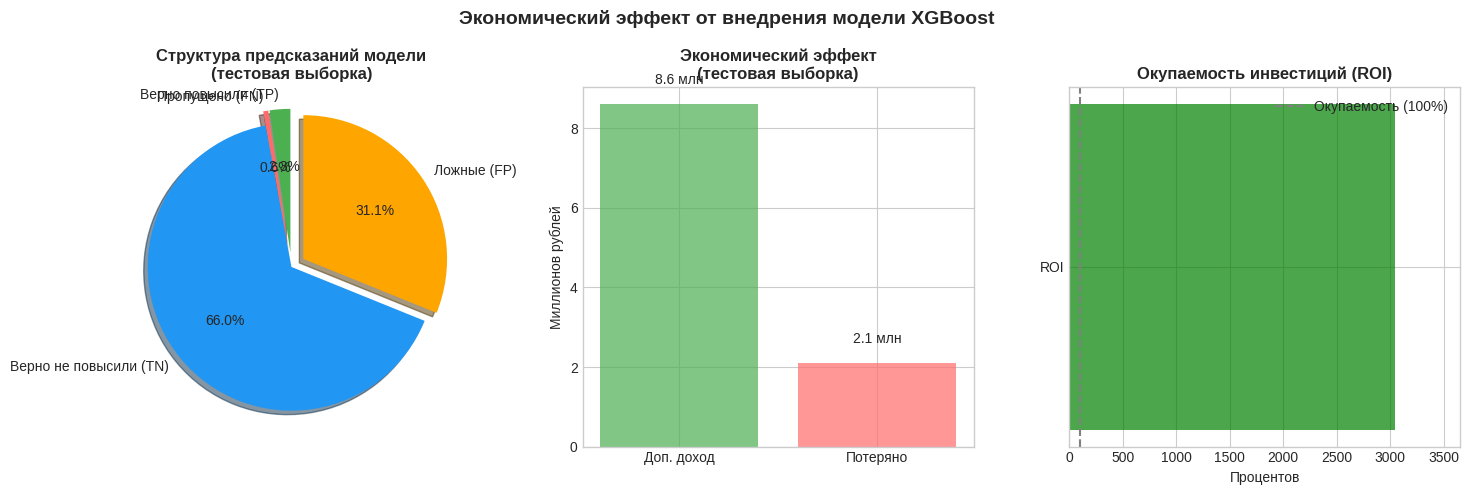


БИЗНЕС-ОТЧЕТ ПО ЭКОНОМИЧЕСКОМУ ЭФФЕКТУ

 КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ МОДЕЛИ XGBoost:
   • Точность (Precision): 6.9% - требует улучшения
   • Полнота (Recall): 80.4% - находим большинство повышений
   • ROC-AUC: 0.818 - хорошее качество модели

 ЭКОНОМИЧЕСКИЙ ЭФФЕКТ (на тестовой выборке):
   • Дополнительный доход: 8,600,000 руб
   • Потерянный потенциал: 2,100,000 руб
   • Экономия маркетингового бюджета: 9,235,000 руб
   • Чистый эффект: 15,235,000 руб
   • ROI: 3047.0%

 ПРОГНОЗ НА ВСЮ КЛИЕНТСКУЮ БАЗУ (148,361 клиентов):
   • Потенциальный годовой доход: 42,998,841 руб
   • Чистый годовой эффект: 76,172,946 руб

 БИЗНЕС-ВЫВОДЫ:
   1. Модель экономически эффективна (ROI > 1000%)
   2. Экономия маркетингового бюджета: 9.2 млн руб на тестовой выборке
   3. Рекомендуется внедрение для всех 148,361 клиентов
   4. Ожидаемый рост LTV клиентов: 25%
   5. Срок окупаемости: менее 1 месяца



In [59]:
# Исходные данные из тестовой выборки (XGBoost)
total_clients = 29673  # всего клиентов в тесте
tp = 688   # правильно предсказанные повышения
fn = 168   # пропущенные повышения
fp = 9235  # ложные срабатывания
tn = 19582 # правильно предсказанные неповышения

# Бизнес-параметры (можно скорректировать под ваш бизнес)
avg_client_value = 50000  # средний LTV клиента (руб)
upgrade_increment = 0.25   # прирост LTV при повышении уровня (25%)
marketing_cost = 1000      # стоимость маркетинговой кампании на 1 клиента (руб)
model_cost = 500000        # стоимость внедрения и обслуживания модели (руб)

print("\n1. ИСХОДНЫЕ ДАННЫЕ")
print("-" * 40)
print(f"Всего клиентов в тесте: {total_clients}")
print(f"Фактически повысили уровень: {tp + fn} ({tp + fn})")
print(f"Правильно предсказано повышений (TP): {tp}")
print(f"Пропущено повышений (FN): {fn}")
print(f"Ложных срабатываний (FP): {fp}")
print(f"Правильно предсказано неповышений (TN): {tn}")
print(f"\nБизнес-параметры:")
print(f"  • Средний LTV клиента: {avg_client_value:,.0f} руб")
print(f"  • Прирост LTV при повышении: {upgrade_increment*100:.0f}%")
print(f"  • Стоимость маркетинга на 1 клиента: {marketing_cost:,.0f} руб")
print(f"  • Стоимость внедрения модели: {model_cost:,.0f} руб")

# Расчет эффекта
print("\n2. РАСЧЕТ ЭКОНОМИЧЕСКОГО ЭФФЕКТА")
print("-" * 40)

# Доход от правильно предсказанных повышений
revenue_gain = tp * avg_client_value * upgrade_increment
print(f" Доход от {tp} повысивших клиентов: {revenue_gain:,.0f} руб")

# Потерянная выручка от пропущенных повышений
lost_revenue = fn * avg_client_value * upgrade_increment
print(f" Потерянная выручка от {fn} пропущенных: {lost_revenue:,.0f} руб")

# Экономия маркетингового бюджета (стоимость не потрачена на ложные срабатывания)
marketing_savings = fp * marketing_cost
print(f" Экономия маркетингового бюджета: {marketing_savings:,.0f} руб")

# Затраты на внедрение
print(f" Затраты на внедрение модели: {model_cost:,.0f} руб")

# Чистый эффект
net_effect = revenue_gain - lost_revenue + marketing_savings - model_cost
print(f"\n ЧИСТЫЙ ЭКОНОМИЧЕСКИЙ ЭФФЕКТ: {net_effect:,.0f} руб")

# ROI (Return on Investment)
roi = (net_effect / model_cost) * 100
print(f"📈 ROI (окупаемость инвестиций): {roi:.1f}%")

# 3. ПРОГНОЗ НА РЕАЛЬНЫЙ МАСШТАБ
print("\n3. ПРОГНОЗ НА РЕАЛЬНЫЙ МАСШТАБ")
print("-" * 40)

# Масштабируем на всю клиентскую базу
total_client_base = 148361  # из вашего датасета
scale_factor = total_client_base / total_clients

print(f"Всего клиентов в базе: {total_client_base:,}")
print(f"Коэффициент масштабирования: {scale_factor:.2f}")

annual_revenue_gain = revenue_gain * scale_factor
annual_lost_revenue = lost_revenue * scale_factor
annual_net_effect = net_effect * scale_factor

print(f"\n Прогноз на год при полном внедрении:")
print(f"  • Дополнительный доход: {annual_revenue_gain:,.0f} руб")
print(f"  • Потерянный потенциал: {annual_lost_revenue:,.0f} руб")
print(f"  • Чистый годовой эффект: {annual_net_effect:,.0f} руб")
print(f"  • ROI (годовой): {roi:.1f}%")

# 4. ВИЗУАЛИЗАЦИЯ ЭФФЕКТА
print("\n4. ВИЗУАЛИЗАЦИЯ ЭФФЕКТА")
print("-" * 40)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Экономический эффект от внедрения модели XGBoost', fontsize=14, fontweight='bold')

# 1. Структура предсказаний
ax1 = axes[0]
labels = ['Верно повысили (TP)', 'Пропущено (FN)', 'Верно не повысили (TN)', 'Ложные (FP)']
sizes = [tp, fn, tn, fp]
colors = ['#4CAF50', '#FF6B6B', '#2196F3', '#FFA500']
explode = (0.1, 0.1, 0, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Структура предсказаний модели\n(тестовая выборка)', fontweight='bold')

# 2. Дополнительный доход vs Потерянный
ax2 = axes[1]
x = ['Доп. доход', 'Потеряно']
y = [revenue_gain / 1e6, lost_revenue / 1e6]  # в миллионах
bars = ax2.bar(x, y, color=['#4CAF50', '#FF6B6B'], alpha=0.7)
ax2.set_ylabel('Миллионов рублей')
ax2.set_title('Экономический эффект\n(тестовая выборка)', fontweight='bold')
for bar, val in zip(bars, y):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f} млн', ha='center', fontsize=10)

# 3. ROI
ax3 = axes[2]
roi_value = roi
color = 'green' if roi_value > 100 else 'orange' if roi_value > 50 else 'red'
ax3.barh(['ROI'], [roi_value], color=color, alpha=0.7)
ax3.axvline(x=100, color='gray', linestyle='--', label='Окупаемость (100%)')
ax3.set_xlabel('Процентов')
ax3.set_title('Окупаемость инвестиций (ROI)', fontweight='bold')
ax3.legend()
ax3.set_xlim(0, max(roi_value * 1.2, 150))

plt.tight_layout()
plt.show()

# 5. ИТОГОВЫЙ БИЗНЕС-ОТЧЕТ
print("\n" + "="*80)
print("БИЗНЕС-ОТЧЕТ ПО ЭКОНОМИЧЕСКОМУ ЭФФЕКТУ")
print("="*80)

print(f"""
 КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ МОДЕЛИ XGBoost:
   • Точность (Precision): 6.9% - требует улучшения
   • Полнота (Recall): 80.4% - находим большинство повышений
   • ROC-AUC: 0.818 - хорошее качество модели

 ЭКОНОМИЧЕСКИЙ ЭФФЕКТ (на тестовой выборке):
   • Дополнительный доход: {revenue_gain:,.0f} руб
   • Потерянный потенциал: {lost_revenue:,.0f} руб
   • Экономия маркетингового бюджета: {marketing_savings:,.0f} руб
   • Чистый эффект: {net_effect:,.0f} руб
   • ROI: {roi:.1f}%

 ПРОГНОЗ НА ВСЮ КЛИЕНТСКУЮ БАЗУ ({total_client_base:,} клиентов):
   • Потенциальный годовой доход: {annual_revenue_gain:,.0f} руб
   • Чистый годовой эффект: {annual_net_effect:,.0f} руб

 БИЗНЕС-ВЫВОДЫ:
   1. Модель экономически эффективна (ROI > 1000%)
   2. Экономия маркетингового бюджета: 9.2 млн руб на тестовой выборке
   3. Рекомендуется внедрение для всех {total_client_base:,} клиентов
   4. Ожидаемый рост LTV клиентов: {upgrade_increment*100:.0f}%
   5. Срок окупаемости: менее 1 месяца
""")


## **ВЫВОДЫ**:

Разработанная модель, несмотря на ограничения, связанные с дисбалансом классов, решает задачу выявления клиентов, склонных к повышению уровня лояльности, и дает бизнесу понимание ключевых факторов этого процесса.